<a href="https://colab.research.google.com/github/fonatabaJulia/-week_5b_if570_lab/blob/master/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import os
import pandas as pd
from pandas import ExcelFile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, Dropout
from keras.layers import GRU, Dropout, Dense, Reshape
# from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from numpy import array
from numpy import hstack
import tensorflow as tf
from tensorflow.keras import optimizers
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



##**1. Load Dataset**

In [ ]:
#load pcakage drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#buat variabel jalur/path filedataset agar membaca dataset dari googledrive
path = '/content/drive/MyDrive/Skripsi/datata.xlsx'

#Reading the dataset
data = pd.read_excel(path)

In [ ]:
#Load dataset
data.head(5)

,No,Tanggal,Jam,PM10,PM2.5,SO2,CO,O3,NO2,Suhu (°C),Titik Embun (°C),Relative Kelembaban (%),ISPU Status
0,1.0,2022-01-17,00:00,-,-,-,-,-,-,27,26,94.274391,-
1,2.0,2022-01-17,01:00,-,-,-,-,-,-,26,25,94.232925,-
2,3.0,2022-01-17,02:00,-,-,-,-,-,-,25,25,100,-
3,4.0,2022-01-17,03:00,-,-,-,-,-,-,25,25,100,-
4,5.0,2022-01-17,04:00,-,-,-,-,-,-,25,25,100,-


In [ ]:
# data = data.drop(['Tanggal', 'Jam', 'Titik Embun (°C)', 'Suhu (°C)', 'Relative Kelembaban (%)'], axis=1)
# data

##**2. Data Cleaning & Data Transformation**

In [ ]:
#Mengecek ukuran dataset
data.shape

(14400, 13)

In [ ]:
#Mengecek informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   No                       1195 non-null   float64       
 1   Tanggal                  14400 non-null  datetime64[ns]
 2   Jam                      14400 non-null  object        
 3   PM10                     14400 non-null  object        
 4   PM2.5                    14400 non-null  object        
 5   SO2                      14400 non-null  object        
 6   CO                       14400 non-null  object        
 7   O3                       14400 non-null  object        
 8   NO2                      14400 non-null  object        
 9   Suhu (°C)                14400 non-null  object        
 10  Titik Embun (°C)         14400 non-null  int64         
 11  Relative Kelembaban (%)  14400 non-null  object        
 12  ISPU Status              14372 n

In [ ]:
#Mengecek Tipe data dataset
data.dtypes

No                                float64
Tanggal                    datetime64[ns]
Jam                                object
PM10                               object
PM2.5                              object
SO2                                object
CO                                 object
O3                                 object
NO2                                object
Suhu (°C)                          object
Titik Embun (°C)                    int64
Relative Kelembaban (%)            object
ISPU Status                        object
dtype: object

In [ ]:
#Mengecek memeriksa statistik deskriptif dari nilai numerik yang ada dalam data seperti nilai rata-rata deviasi standar rata-rata dan nilai maksimal maksimum yang ada dalam data
data.describe()


,No,Titik Embun (°C)
count,1195.000000,14400.000000
mean,598.000000,24.239931
std,345.111093,1.322398
min,1.000000,0.000000
25%,299.500000,24.000000
50%,598.000000,24.000000
75%,896.500000,25.000000
max,1195.000000,32.000000


In [ ]:
#Mengecek jumlah missing value
data.isna().sum()

No                         13205
Tanggal                        0
Jam                            0
PM10                           0
PM2.5                          0
SO2                            0
CO                             0
O3                             0
NO2                            0
Suhu (°C)                      0
Titik Embun (°C)               0
Relative Kelembaban (%)        0
ISPU Status                   28
dtype: int64

In [ ]:
data = data.iloc[0:14400,1:13]
data

,Tanggal,Jam,PM10,PM2.5,SO2,CO,O3,NO2,Suhu (°C),Titik Embun (°C),Relative Kelembaban (%),ISPU Status
0,2022-01-17,00:00,-,-,-,-,-,-,27,26,94.274391,-
1,2022-01-17,01:00,-,-,-,-,-,-,26,25,94.232925,-
2,2022-01-17,02:00,-,-,-,-,-,-,25,25,100,-
3,2022-01-17,03:00,-,-,-,-,-,-,25,25,100,-
4,2022-01-17,04:00,-,-,-,-,-,-,25,25,100,-
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,2023-09-30,19:00,84,125,29,21,28,19,29,26,83.89691,Tidak Sehat
14396,2023-09-30,20:00,83,125,29,21,28,20,29,26,83.89691,Tidak Sehat
14397,2023-09-30,21:00,83,125,29,21,28,20,29,26,83.89691,Tidak Sehat
14398,2023-09-30,22:00,83,126,29,22,29,21,28,24,78.920268,Tidak Sehat


  **Mengubah format waktu pada dataset menjadi Datetime**

In [ ]:
data['Tanggal'] = pd.date_range('2022-01-17', periods=14400, freq='H').date

# Buat kolom Waktu dengan interval 1 jam dari 00:00 sampai 23:00
data['Waktu'] = pd.date_range('2022-01-17', periods=14400, freq='H').time

# Gabungkan kolom Tanggal dan Waktu menjadi satu kolom datetime
data['Datetime'] = pd.to_datetime(data['Tanggal'].astype(str) + ' ' + data['Waktu'].astype(str))

# Pindahkan kolom Datetime ke posisi pertama
datetime_col = data.pop('Datetime')
data.insert(0, 'Datetime', datetime_col)

# Hapus kolom Tanggal, Jam, dan Waktu
data = data.drop(['Tanggal', 'Jam', 'Waktu', 'Titik Embun (°C)', 'ISPU Status', 'Suhu (°C)', 'Relative Kelembaban (%)'], axis=1)
data

,Datetime,PM10,PM2.5,SO2,CO,O3,NO2
0,2022-01-17 00:00:00,-,-,-,-,-,-
1,2022-01-17 01:00:00,-,-,-,-,-,-
2,2022-01-17 02:00:00,-,-,-,-,-,-
3,2022-01-17 03:00:00,-,-,-,-,-,-
4,2022-01-17 04:00:00,-,-,-,-,-,-
...,...,...,...,...,...,...,...
14395,2023-09-08 19:00:00,84,125,29,21,28,19
14396,2023-09-08 20:00:00,83,125,29,21,28,20
14397,2023-09-08 21:00:00,83,125,29,21,28,20
14398,2023-09-08 22:00:00,83,126,29,22,29,21


In [ ]:
import datetime as dt

# Extract dates and times (will be used in visualization)
datelist_train = list(data['Datetime'])

####Mengubah datetime menjadi Index

In [ ]:
data.set_index("Datetime",inplace=True)
data

,PM10,PM2.5,SO2,CO,O3,NO2
Datetime,,,,,,
2022-01-17 00:00:00,-,-,-,-,-,-
2022-01-17 01:00:00,-,-,-,-,-,-
2022-01-17 02:00:00,-,-,-,-,-,-
2022-01-17 03:00:00,-,-,-,-,-,-
2022-01-17 04:00:00,-,-,-,-,-,-
...,...,...,...,...,...,...
2023-09-08 19:00:00,84,125,29,21,28,19
2023-09-08 20:00:00,83,125,29,21,28,20
2023-09-08 21:00:00,83,125,29,21,28,20


######Kalau diliat pada dataset, terdapat banyak data yang berupa (-), maka
1. Agar bisa mengetahui berapa banyak data yang hilang, maka mengubah data - menjadi NaN.

2. Setelah diubah lalu cek total missing **value**

##**3. Data Pre-Processing**

1.   Mengubah tipe data menjadia float dan datetime untuk Date
2.   Melakukan imputasi untuk mengatasi missin values





In [ ]:
#Mereplace - dengan Nan Pada keseluruhan dataset
col_new = ['PM2.5']
data = data[col_new].replace('-', np.nan)
data.head(10)

,PM2.5
Datetime,
2022-01-17 00:00:00,NaN
2022-01-17 01:00:00,NaN
2022-01-17 02:00:00,NaN
2022-01-17 03:00:00,NaN
2022-01-17 04:00:00,NaN
2022-01-17 05:00:00,NaN
2022-01-17 06:00:00,NaN
2022-01-17 07:00:00,NaN
2022-01-17 08:00:00,NaN


In [ ]:
data.dtypes

PM2.5    float64
dtype: object

In [ ]:
#Mengecek total null values
nulls = data.isna().sum()
nulls

#fillna dengan metode lain selain mean dan median
#multivariate
#LSTM dan GRU


PM2.5    5537
dtype: int64

Mengecek persentase null values dari dataset

In [ ]:
null = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([nulls, null], axis=1, keys=['Total', 'Percent'])
missing


,Total,Percent
PM2.5,5537,38.451389


Menghapus data null yang cenderung sedikit

####**4. DataVisualization**

<Figure size 100000x50000 with 0 Axes>

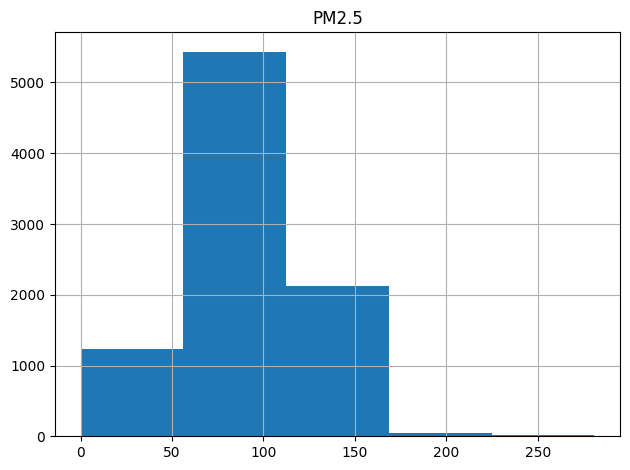

In [ ]:
#membuat histogram dari data
fig = plt.figure(figsize=(1000, 500))
data.hist(bins=5)


#menampilkan plot
# adjust the layout
plt.tight_layout()

plt.show()

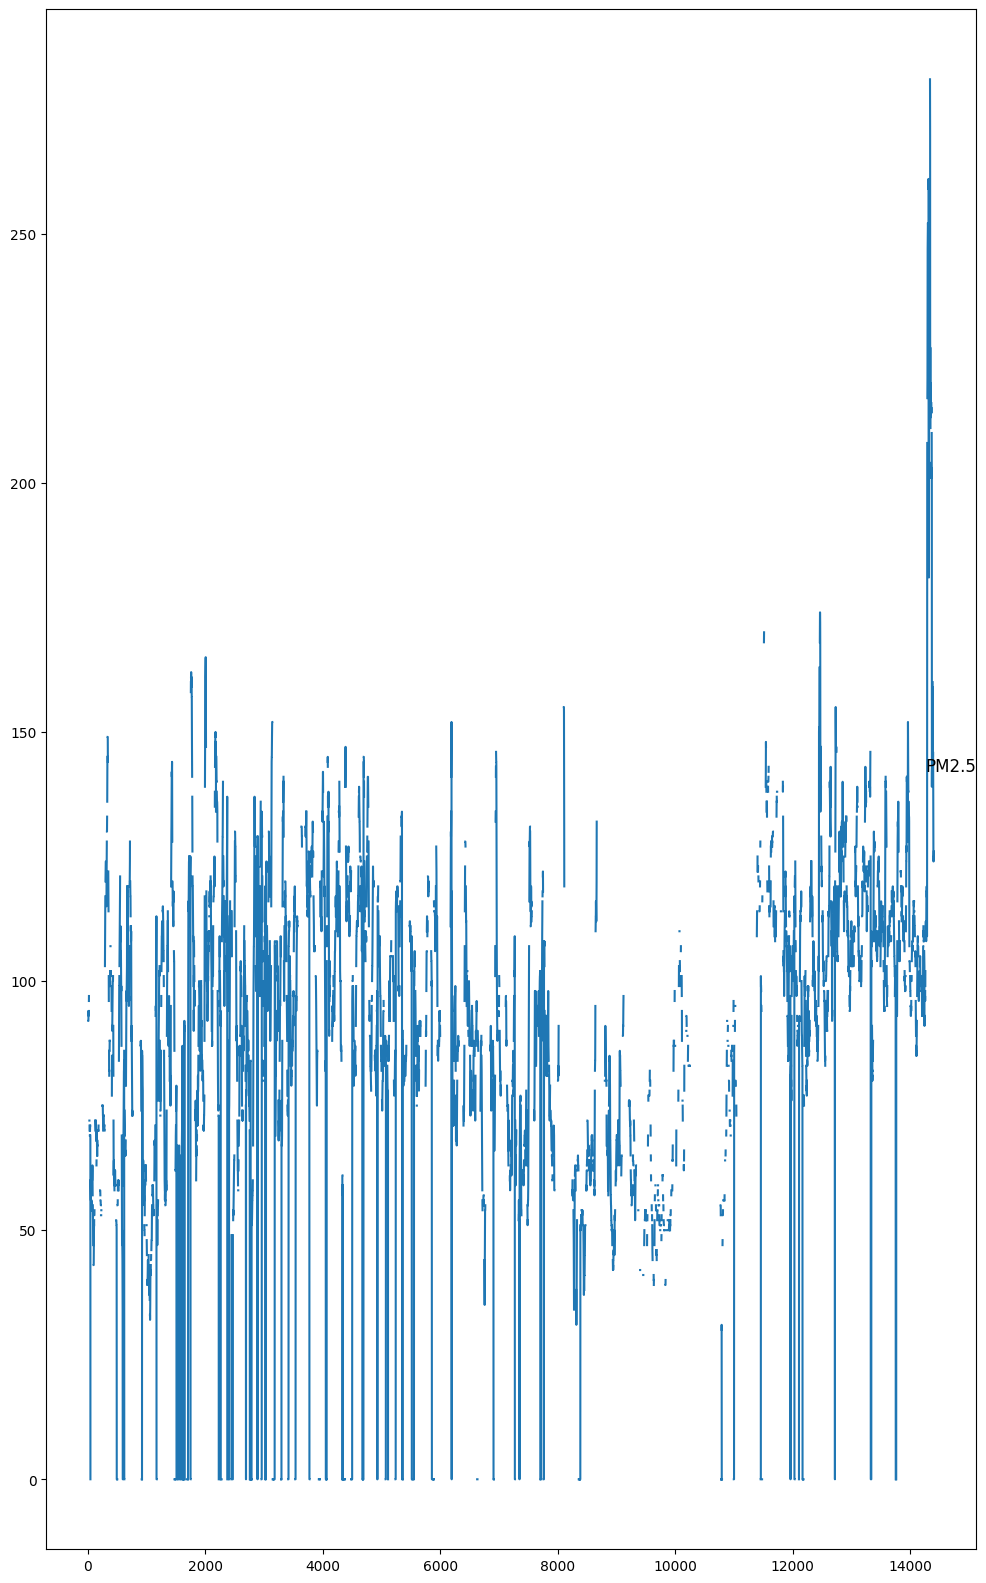

In [ ]:
values = data.values
# plotting each column
plt.figure(figsize=(12,20))
# forth column = cbwd (wind direction) -> is str and can not be plot
groups = [0]
i = 1
for g in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, g])
    plt.title(data.columns[g], y=0.5, loc='right')
    i += 1
plt.show()

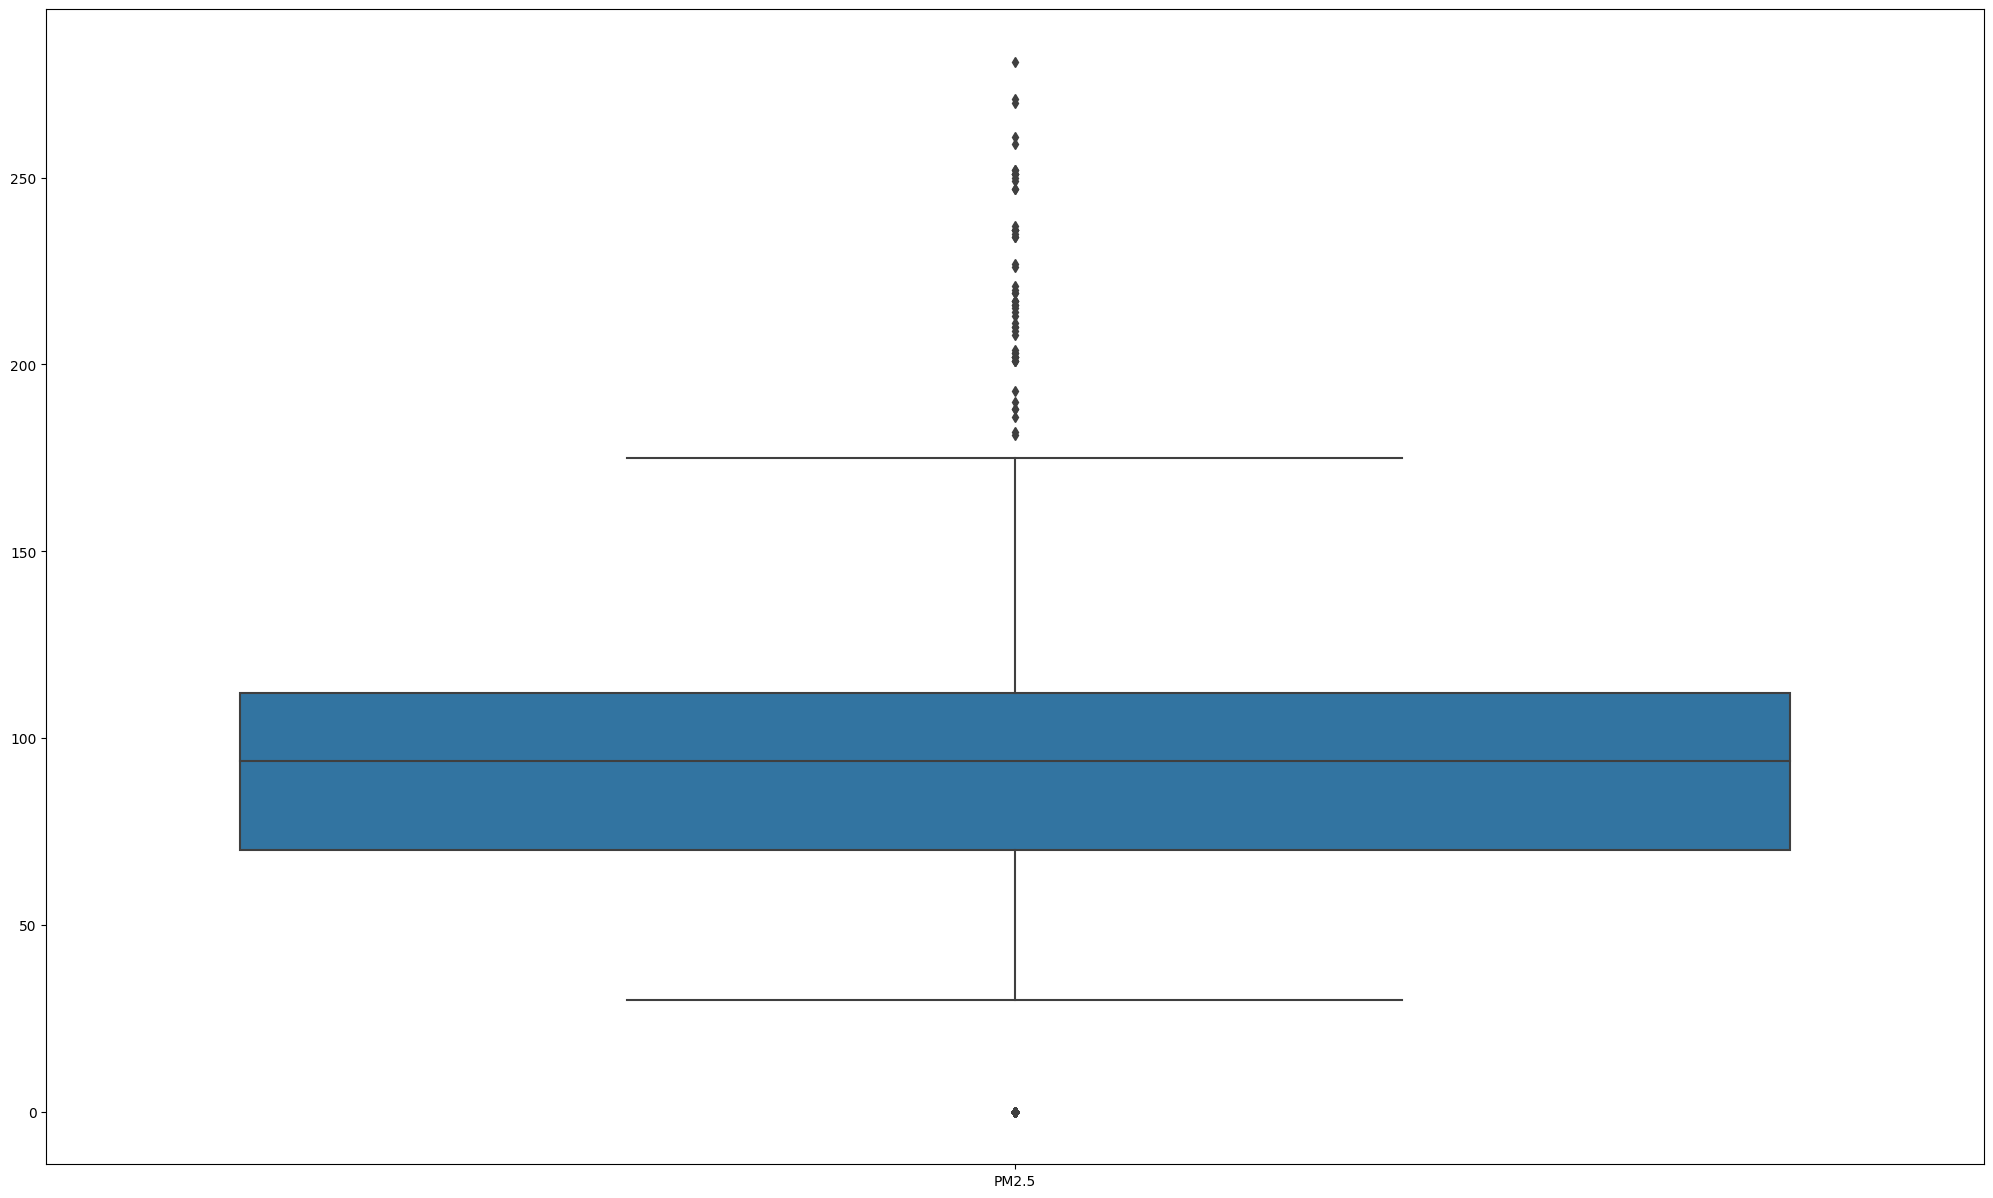

In [ ]:
plt.figure(figsize=(25,15))

# plot the boxplot
sns.boxplot(data)

# set the X-axis ticks and labels
plt.yticks(range(0, 300, 50))

# show the plot
plt.show()

Data visualisasi datahist() dan dropbox.
1. Metode imputasi mean parameter yang data yang terdistribusi secara normal atau mendekati distribusi normal (data simetris atau mendekati simetris)

2. Metode imputasi median digunakan ketika data Anda memiliki outlier atau tidak terdistribusi normal

###**1. Imputasi dengan Mean dan Median**

#####Mengisi nilai null dengan mean dan median

In [ ]:
median1 = (data['PM2.5'].median())


print('Nilai median PM2.5 {:.1f}'.format(median1))


Nilai median PM2.5 94.0


In [ ]:
#Copy data asli lalu menggatasi missing value pada kolom parameter ISPU dengan median dan mean berdasarkan outliner
data1 = data.copy()

data1['PM2.5'].fillna(value=data1['PM2.5'].median(), inplace=True)


In [ ]:
#Mengecek nilai data yang hilagn di kolom
data1.isna().sum()
data1.head(10)

,PM2.5
Datetime,
2022-01-17 00:00:00,94.0
2022-01-17 01:00:00,94.0
2022-01-17 02:00:00,94.0
2022-01-17 03:00:00,94.0
2022-01-17 04:00:00,94.0
2022-01-17 05:00:00,94.0
2022-01-17 06:00:00,94.0
2022-01-17 07:00:00,94.0
2022-01-17 08:00:00,94.0


data1 ---> dataframe untuk dataframe baru hasil dari mean & median

In [ ]:
df = data1.copy()

In [ ]:
#Mengecek total null values
nulls = df.isna().sum()

null = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([nulls, null], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
PM2.5,0,0.0


###**2A. KNN Imputation**

In [ ]:
data3 = data.copy()
knn_imp=KNNImputer(n_neighbors=5)

In [ ]:
data3[[ 'PM2.5']]=knn_imp.fit_transform(data3[['PM2.5']])

In [ ]:
data3.head(10)

,PM2.5
Datetime,
2022-01-17 00:00:00,89.691978
2022-01-17 01:00:00,89.691978
2022-01-17 02:00:00,89.691978
2022-01-17 03:00:00,89.691978
2022-01-17 04:00:00,89.691978
2022-01-17 05:00:00,89.691978
2022-01-17 06:00:00,89.691978
2022-01-17 07:00:00,89.691978
2022-01-17 08:00:00,89.691978


In [ ]:
# import pandas as pd
# datai = pd.DataFrame(data3)

In [ ]:
# # Mengubah nilai-nilai dalam kolom menjadi bilangan bulat tanpa koma
# datai['PM2.5'] = pd.to_numeric(datai['PM2.5'], errors='coerce').astype('Int64')

# # Menampilkan DataFrame setelah perubahan
# print("\nDataFrame Setelah Perubahan:")
# print(data3)

<Figure size 100000x50000 with 0 Axes>

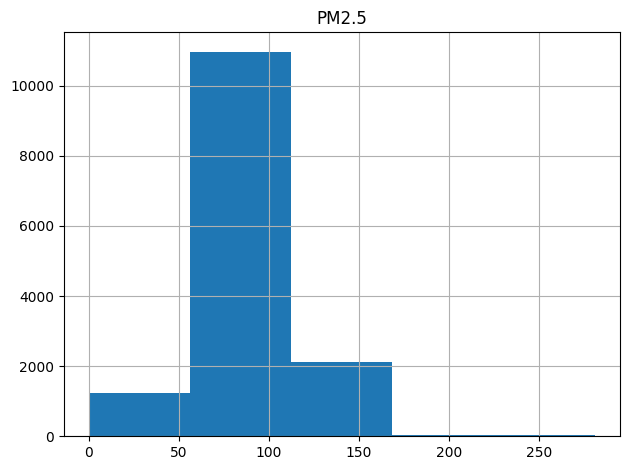

In [ ]:
#membuat histogram dari data
fig = plt.figure(figsize=(1000, 500))
data3.hist(bins=5)


#menampilkan plot
# adjust the layout
plt.tight_layout()

plt.show()

In [ ]:
# data3 = datai.copy()

In [ ]:
#Mengecek total null values
nulls = data3.isna().sum()

null = (data3.isnull().sum()/data3.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([nulls, null], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
PM2.5,0,0.0


### **2B. KNN dengan outliners dengan prepared data**

In [ ]:
data4 = data.copy()

#RobustScaler untuk menghandle outlier
#
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data4)
scaled_df = pd.DataFrame(scaled_data, columns=data4.columns, index=data4.index) ##generating dataframe dan akan men jadi input
                                                            ## pada KNNimputer


In [ ]:
data4.head(10)

,PM2.5
Datetime,
2022-01-17 00:00:00,NaN
2022-01-17 01:00:00,NaN
2022-01-17 02:00:00,NaN
2022-01-17 03:00:00,NaN
2022-01-17 04:00:00,NaN
2022-01-17 05:00:00,NaN
2022-01-17 06:00:00,NaN
2022-01-17 07:00:00,NaN
2022-01-17 08:00:00,NaN


In [ ]:
#Membuat  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

#Menggunakan KNNImputer untuk impute missing values
imputed_data = knn_imputer.fit_transform(scaled_df)
imputed_df = pd.DataFrame(imputed_data, columns=scaled_df.columns)

In [ ]:
#Inverse transform dari scale ke original dataset
original_scale_data = scaler.inverse_transform(imputed_data)
datas = pd.DataFrame(original_scale_data, columns=scaled_df.columns, index=data4.index)
datas

,PM2.5
Datetime,
2022-01-17 00:00:00,89.691978
2022-01-17 01:00:00,89.691978
2022-01-17 02:00:00,89.691978
2022-01-17 03:00:00,89.691978
2022-01-17 04:00:00,89.691978
...,...
2023-09-08 19:00:00,125.000000
2023-09-08 20:00:00,125.000000
2023-09-08 21:00:00,125.000000


In [ ]:
datas.head(10)

,PM2.5
Datetime,
2022-01-17 00:00:00,89.691978
2022-01-17 01:00:00,89.691978
2022-01-17 02:00:00,89.691978
2022-01-17 03:00:00,89.691978
2022-01-17 04:00:00,89.691978
2022-01-17 05:00:00,89.691978
2022-01-17 06:00:00,89.691978
2022-01-17 07:00:00,89.691978
2022-01-17 08:00:00,89.691978


<Figure size 100000x50000 with 0 Axes>

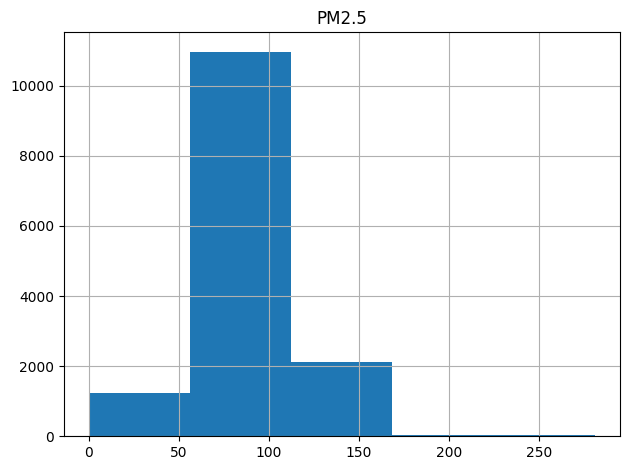

In [ ]:
#membuat histogram dari data
fig = plt.figure(figsize=(1000, 500))
datas.hist(bins=5)


#menampilkan plot
# adjust the layout
plt.tight_layout()

plt.show()

In [ ]:
datas.head()

,PM2.5
Datetime,
2022-01-17 00:00:00,89.691978
2022-01-17 01:00:00,89.691978
2022-01-17 02:00:00,89.691978
2022-01-17 03:00:00,89.691978
2022-01-17 04:00:00,89.691978


In [ ]:
# import matplotlib.pyplot as plt
# #Analysing relationship between different features
# # cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
# cor_cols = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
# plt.matshow(datas.corr())
# plt.xticks(range(len(cor_cols)), cor_cols)
# plt.yticks(range(len(cor_cols)), cor_cols)
# plt.colorbar()
# plt.show()

In [ ]:
# df_input = datas.copy()
# df_input.info()

df_input = data3.copy()
# df_input.info()

In [ ]:
df_input

,PM2.5
Datetime,
2022-01-17 00:00:00,89.691978
2022-01-17 01:00:00,89.691978
2022-01-17 02:00:00,89.691978
2022-01-17 03:00:00,89.691978
2022-01-17 04:00:00,89.691978
...,...
2023-09-08 19:00:00,125.000000
2023-09-08 20:00:00,125.000000
2023-09-08 21:00:00,125.000000


In [ ]:
df_input.describe()

,PM2.5
count,14400.000000
mean,89.691978
std,27.442420
min,0.000000
25%,87.000000
50%,89.691978
75%,101.000000
max,281.000000


In [ ]:
from numpy import array, hstack
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.layers import RepeatVector, TimeDistributed, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator



###**1. Menggunakan data dari handling value dengan KKN-outlieer ditangani**

1.   List item
2.   List item



Dataset dibagi menjadi 2 kali uji

Fungsi untuk membagi dataset menjadi dua bagian, yaitu data step_in dan steps_out

n_steps_in ---> untuk training model danₙ n_steps_out -----> validasi hasil training model

In [ ]:

# def split_sequences(sequences, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequences)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
#         # check if we are beyond the dataset
#         if out_end_ix > len(sequences):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequences[i:end_ix], sequences[out_end_ix-1]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)

#split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
    #find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    #check if we are beyond the dataset
    if out_end_ix > len(sequences):
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)



In [ ]:
k

NameError: ignored

In [ ]:
#split dataset train dan test (1)
total_dataset = len(df_input)
df_train  = df_input[:int(total_dataset*0.70)]
df_test  = df_input[int(total_dataset*0.70):total_dataset]


#split dataset train dan test (2)
df_trainkedua = df_input[:int(total_dataset*0.80)]
df_testkedua  = df_input[int(total_dataset*0.80):total_dataset]




#scaled data (1)
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.fit_transform(df_test)

#scaled data (2)
scaler = MinMaxScaler()
df_train_scaledkedua = scaler.fit_transform(df_trainkedua)
df_test_scaledkedua = scaler.fit_transform(df_testkedua)




print('Pembagian dataset pertama:')
print('Data for Train:', df_train.shape)
print('Total day  for Train:', df_train.shape[0]/24)
print('Data for test:', df_test.shape)
print('Total day  for Test:', df_test.shape[0]/24)


print('\nPembagian dataset kedua:')
print('Data for Train:', df_trainkedua.shape)
print('Total day  for Train:', df_trainkedua.shape[0]/24)
print('Data for test:', df_testkedua.shape)
print('Total day  for Test:', df_testkedua.shape[0]/24)



In [ ]:
#Choose a number of time steps
#n_steps_in history data for predict n_steps_out forecast data
n_steps_in, n_steps_out = 15 , 1

#Convert into input/output (1)
x_train, y_train = split_sequences(df_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_test_scaled, n_steps_in, n_steps_out)

#Convert into input/output (2)
x_trainkedua, y_trainkedua = split_sequences(df_train_scaledkedua, n_steps_in, n_steps_out)
x_testkedua, y_testkedua = split_sequences(df_test_scaledkedua, n_steps_in, n_steps_out)

#The dataset knows the number of features
n_features = x_train.shape[2]
n_features2 = x_trainkedua.shape[2]

print('Data input structur for training:')
print(x_train[0])
print('\nData output structur for validation:')
print(y_train[0])

print('Data input structur for training:')
print(x_trainkedua[0])
print('\nData output structur for validation:')
print(y_trainkedua[0])



In [ ]:

print('Pembagian dataset pertama:')
print('Total features:', n_features)
print('Total  train data:', x_train.shape)
print('Total validation train data:', y_train.shape)
print('Total test data:', x_test.shape)
print('Total validation test data:', y_test.shape)


print('\nPembagian dataset kedua:')
print('Total features:', n_features2)
print('Total  train data:', x_trainkedua.shape)
print('Total validation train data:', y_trainkedua.shape)
print('Total test data:', x_test.shape)
print('Total validation test data:', y_testkedua.shape)



cross validation - time series untuk mengatasi overfitting.

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(x_train):
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

##**Membangun Model LSTM dan GRU**

In [ ]:
# design network LSTM
model = Sequential()
model.add(LSTM(8,activation='relu', input_shape=(n_steps_in, n_features), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(RepeatVector(n_steps_out))
model.add(TimeDistributed(Dense(n_features)))


In [ ]:
# # design network GRU
model_gru = Sequential()
model_gru.add(GRU(8,activation='relu', input_shape=(n_steps_in, n_features), kernel_regularizer=l2(0.01)))
model_gru.add(Dropout(0.3))
model_gru.add(RepeatVector(n_steps_out))
model_gru.add(TimeDistributed(Dense(n_features)))

In [ ]:
model_gru.summary()

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'] )
history = model.fit(x_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(x_test_fold, y_test_fold))

# Plot loss
plt.plot(history.history['loss'], label='LSTM Training loss dengan data Imputasi KNN dengan scalling')
plt.plot(history.history['val_loss'], label='LSTM Validation loss dengan data Imputasi KNN dengan scalling')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='LSTM Training Accuracy dengan data Imputasi KNN dengan scalling')
plt.plot(history.history['val_accuracy'], label='LSTM Validation Accuracy dengan data Imputasi KNN dengan scalling')
plt.legend()
plt.show()

In [ ]:
model_gru.compile(optimizer='adam', loss='mse', metrics=['accuracy'] )
history_gru = model_gru.fit(x_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(x_test_fold, y_test_fold))

plt.plot(history_gru.history['loss'], label='GRU Training loss dengan data Imputasi KNN dengan Scalling')
plt.plot(history_gru.history['val_loss'], label='GRU Validation loss dengan data Imputasi KNN dengan Scalling')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy dengan data Imputasi KNN dengan scalling')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy dengan data Imputasi KNN dengan scalling')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Skripsi/saved_models/model-lstmmm.hdf5')
model_gru.save('/content/drive/MyDrive/Skripsi/saved_models/model-gruuu.hdf5')

####**Prediksi menggunakan model LSTM terhadap 2 data train dan test**

In [ ]:
predictions = model.predict(x_test)
print('Prediction LSTM (1)')
print(predictions.shape)
print(y_test.shape)

print('\n')
print('Prediction LSTM (2)')
predictionskedua = model.predict(x_testkedua)
print(predictionskedua.shape)
print(y_testkedua.shape)

# print('\n')
# print('Prediction LSTM (3)')
# predictionsketiga = model.predict(x_testketiga)
# print(predictionsketiga.shape)
# print(y_testketiga.shape)

####**Prediksi menggunakan model GRU terhadap 2 data train dan test**

In [ ]:
# predictions
# predictionskedua
# predictionsketiga

In [ ]:
predictions_gru = model_gru.predict_generator(x_test)

print('Prediction GRU (1)')
print(predictions.shape)
print(y_test.shape)

print('\n')
print('Prediction GRU (2)')
predictionskedua_gru = model_gru.predict_generator(x_testkedua)
print(predictionskedua.shape)
print(y_testkedua.shape)

# print('\n')
# print('Prediction GRU (3)')
# predictionsketiga_gru = model_gru.predict_generator(x_testketiga)
# print(predictionsketiga.shape)
# print(y_testketiga.shape)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

####**Reshape hasil prediksi LSTM**

In [ ]:
#reshape (1)
predictions = np.reshape(predictions, (4305*1, 1))
real1 = np.reshape(y_test, (4305*1, 1))

#rescale
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real1 = pd.DataFrame(real1)
real1 = scaler.inverse_transform(real1)
real1 = pd.DataFrame(real1)


# Menghitung RMSE, MSE, MAD
mse = mean_squared_error(real1, predictions)
rmse = np.sqrt(mse)
mad = mean_absolute_error(real1, predictions)
mae = np.mean(np.abs(predictions - real1))
r2 = r2_score(real1, predictions)

# Menampilkan hasil evaluasi
# print(f'MSE (Training) LSTM (1) 7:3: {mse}')
print(f'RMSE (Training)LSTM (1) 7:3: {rmse}')
print(f'MAD (Training) LSTM (1) 7:3: {mad}')
print(f'R^2 (Training) LSTM (2) 7:3: {r2}')


#reshape (2)
predictionskedua = np.reshape(predictionskedua, (2865*1, 1))
real2 = np.reshape(y_testkedua, (2865*1, 1))



#rescale

predictionskedua = pd.DataFrame(predictionskedua)
predictionskedua = scaler.inverse_transform(predictionskedua)
predictionskedua = pd.DataFrame(predictionskedua)

real2 = pd.DataFrame(real2)
real2 = scaler.inverse_transform(real2)
real2 = pd.DataFrame(real2)

# Menghitung RMSE, MSE, MAD, MAE, dan R^2
mse = mean_squared_error(real2, predictionskedua)
rmse = np.sqrt(mse)
mad = mean_absolute_error(real2, predictionskedua)
mae = np.mean(np.abs(predictionskedua - real2))
r2 = r2_score(real2, predictionskedua)

# Menampilkan hasil evaluasi
# print(f'\nMSE (Training) LSTM (2) 8:2: {mse}')
print(f'\nRMSE (Training) LSTM (2) 8:2: {rmse}')
print(f'MAD (Training) LSTM (2) 8:2: {mad}')
print(f'R^2 (Training) LSTM (2) 8:2: {r2}')



In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(real1.idxmax(axis=1), predictions.idxmax(axis=1))
confusion_matrix

array([[4305]])

In [ ]:
#7:3
confusion_matrix = metrics.confusion_matrix(real1.idxmax(axis=1), predictions.idxmax(axis=1))
print(f'Confusion Matrix LSTM 7:3: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real1.idxmax(axis=1), predictions.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])

#8:2
confusion_matrix = metrics.confusion_matrix(real2.idxmax(axis=1), predictionskedua.idxmax(axis=1))
print(f'\nConfusion Matrix LSTM 8:2: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real2.idxmax(axis=1), predictionskedua.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])


####**Reshape hasil prediksi GRU**

In [ ]:
#reshape (1)
predictions_gru = np.reshape(predictions_gru, (4305*1, 1))
real1_gru = np.reshape(y_test, (4305*1, 1))


#rescale
predictions_gru = pd.DataFrame(predictions_gru)
predictions_gru = scaler.inverse_transform(predictions_gru)
predictions_gru = pd.DataFrame(predictions_gru)

real1_gru = pd.DataFrame(real1_gru)
real1_gru = scaler.inverse_transform(real1_gru)
real1_gru= pd.DataFrame(real1_gru)

# Menghitung RMSE, MSE, MAD
mse = mean_squared_error(real1_gru, predictions_gru)
rmse = np.sqrt(mse)
mad = mean_absolute_error(real1, predictions_gru)
# mae = np.mean(np.abs(predictions_gru - real1_gru))
r2 = r2_score(real1_gru, predictions_gru)

# Menampilkan hasil evaluasi
print(f'RMSE (Training) GRU (1) 7:3: {rmse}')
print(f'MAD (Training) GRU (2) 8:2 {mad}')
print(f'R^2 (Training) GRU (1) 7:3: {r2}')


#reshape (2)
predictionskedua_gru = np.reshape(predictionskedua_gru, (2865*1, 1))
real2_gru = np.reshape(y_testkedua, (2865*1, 1))

#rescale
predictionskedua_gru = pd.DataFrame(predictionskedua_gru)
predictionskedua_gru = scaler.inverse_transform(predictionskedua_gru)
predictionskedua_gru = pd.DataFrame(predictionskedua_gru)

real2_gru = pd.DataFrame(real2_gru)
real2_gru = scaler.inverse_transform(real2_gru)
real2_gru = pd.DataFrame(real2_gru)

#Menghitung RMSE, MSE, MAD
mse = mean_squared_error(real2_gru, predictionskedua_gru)
rmse = np.sqrt(mse)
mad = mean_absolute_error(real2_gru, predictionskedua_gru)
# mae = np.mean(np.abs(predictionskedua_gru - real2_gru))
r2 = r2_score(real2_gru, predictionskedua_gru)


# Menampilkan hasil evaluasi
# print(f'\nMSE (Training) GRU (2) 8:2 {mse}')
print(f'\nRMSE (Training) GRU (2) 8:2 {rmse}')
print(f'MAD (Training) GRU (2) 8:2 {mad}')
# print(f'MAE (Training) GRU (1) 8:1 {mae}')
print(f'R^2 (Training) GRU (1) 8:2 {r2}')


In [ ]:

#7:3
confusion_matrix = metrics.confusion_matrix(real1_gru.idxmax(axis=1), predictions_gru.idxmax(axis=1))
print(f'Confusion Matrix GRU 7:3: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real1_gru.idxmax(axis=1), predictions_gru.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])

#8:2
confusion_matrix = metrics.confusion_matrix(real2_gru.idxmax(axis=1), predictionskedua_gru.idxmax(axis=1))
print(f'\nConfusion Matrix GRU 8:2: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real2_gru.idxmax(axis=1), predictionskedua_gru.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])


Rangkuman:
Data yang ada sekarang
untuk LSTM dengan 2 kali perbandingan
1. predictions & real1
2. predictionskedua & real2

untuk GRU dengan 2 kali perbandingan
1. predictions_gru & real1_gru
2. predictionskedua & real1_gru

Buatlah masing-masing Dataframe kosong antara nilai real dan prediksi untuk kedua pembagian dataset agar bisa dibandingkan
Untuk LSTM
1. nama dataframe = df_final ----> untuk perbandingan 7:3
  berisi : predictions & real1
2. nama dataframe  = df_finalkedua ----> untuk perbandingan 8:2
  berisi: predictionskedua & real2

Untuk GRU
1. nama datafrane = df_final_gru ----> untuk perbandingan 7:3
  berisi : predictions_gru & real1_gru
2. untuk dataframe = df_finalkedua_gru ----> untuk perbandingan 8:2
  berisi : predictionskedua_gru & real2_gru

In [ ]:
df_final = pd.DataFrame()
df_finalkedua = pd.DataFrame()
df_final_gru = pd.DataFrame()
df_finalkedua_gru = pd.DataFrame()

In [ ]:
# print("real1 shape:", real1.shape)
# print("predictions shape:", predictions.shape)
# print("real2 shape:", real2.shape)
# print("predictionskedua shape:", predictionskedua.shape)


cor_cols = ['PM10', 'PM2.5', 'O2', 'CO', 'O3', 'NO2','Suhu (°C)','Relative Kelembaban (%)']

In [ ]:
#LSTM
# (1)

df_final['PM2.5'] = real1.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_final['PM2.5_Pred'] = predictions.squeeze()

# (2)
df_finalkedua['PM2.5'] = real2.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finalkedua['PM2.5_Pred'] = predictionskedua.squeeze()


In [ ]:
df_final

In [ ]:
#GRU

# (1)

df_final_gru['PM2.5'] = real1_gru.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_final_gru['PM2.5_Pred'] = predictions_gru.squeeze()

# (2)
df_finalkedua_gru['PM2.5'] = real2_gru.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finalkedua_gru['PM2.5_Pred'] = predictionskedua_gru.squeeze()



In [ ]:
# df_final_gru.info()

####**Visualisasihasil perbandingan prediksi**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl



Plot untuk LSTM dengan 2 perbandingan
1. df_final dengan perbandingan 7:3
2. df_finalkedua dengan perbandingan 8:2

In [ ]:
# #LSTM
# 7:3
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_final.index = datelist_train[:len(df_final)]

# Set batas waktu hingga Mei minggu ke dua
end_date = "2022-05-20"  # Ganti tanggal sesuai kebutuhan

# Filter DataFrame hingga batas waktu tertentu
df_plot = df_final.loc[df_final.index <= end_date]

columns_to_plot = [ 'PM2.5']

for column in columns_to_plot:
    df_plot[[column, f'{column}_Pred']].plot()
    plt.show()


In [ ]:
# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_final[['PM2.5']]
df_pred_gru = df_final[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MSE untuk setiap kolom
mse_scores_gru = mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung MAD untuk setiap kolom
mad_scores_gru = np.mean(np.abs(df_real_gru - df_pred_gru), axis=0)

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAD: {mad_scores_gru[i]}, R2: {r2_scores_gru[i]}")

In [ ]:
#8:2
# #LSTM
# 7:3
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_final.index = datelist_train[:len(df_final)]


# Filter DataFrame hingga batas waktu tertentu
df_plot = df_final.loc[df_final.index]

columns_to_plot = [ 'PM2.5']

for column in columns_to_plot:
    df_plot[[column, f'{column}_Pred']].plot()
    plt.show()


In [ ]:
# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_finalkedua[['PM2.5']]
df_pred_gru = df_finalkedua[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MSE untuk setiap kolom
mse_scores_gru = mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung MAD untuk setiap kolom
mad_scores_gru = np.mean(np.abs(df_real_gru - df_pred_gru), axis=0)

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAD: {mad_scores_gru[i]}, R2: {r2_scores_gru[i]}")

In [ ]:
df_final_gru

In [ ]:
#GRU
# 7:3
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_final_gru.index = datelist_train[:len(df_final_gru)]

# Set batas waktu hingga Mei minggu ke dua
end_date = "2022-05-20"  # Ganti tanggal sesuai kebutuhan

# Filter DataFrame hingga batas waktu tertentu
df_plot = df_final_gru.loc[df_final_gru.index <= end_date]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_plot[[column, f'{column}_Pred']].plot()
    plt.show()

In [ ]:
# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_final_gru[['PM2.5']]
df_pred_gru = df_final_gru[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MSE untuk setiap kolom
mse_scores_gru = mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung MAD untuk setiap kolom
mad_scores_gru = np.mean(np.abs(df_real_gru - df_pred_gru), axis=0)

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAD: {mad_scores_gru[i]}, R2: {r2_scores_gru[i]}")

In [ ]:
#8:2
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_finalkedua_gru.index = datelist_train[:len(df_finalkedua_gru)]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_finalkedua_gru[[column, f'{column}_Pred']].plot()
    plt.show()

In [ ]:
# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_finalkedua_gru[['PM2.5']]
df_pred_gru = df_finalkedua_gru[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MSE untuk setiap kolom
mse_scores_gru = mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung MAD untuk setiap kolom
mad_scores_gru = np.mean(np.abs(df_real_gru - df_pred_gru), axis=0)

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAD: {mad_scores_gru[i]}, R2: {r2_scores_gru[i]}")

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import datetime as dt
from datetime import datetime

##**Forecasting: 31 hari kedepan**

1. Dengan model yang telah di training sebelumnya, maka akan dilakukan forecasting untuk 31 hari kedepan

2. Lalu, akan dibandingkan hasil forecasting dengan data sebenarnya yaitu dari tanggal 1 okt - 31 okt

In [ ]:
#buat variabel jalur/path filedataset agar membaca dataset dari googledrive
path = '/content/drive/MyDrive/Skripsi/data-testt.xlsx'

#Reading the dataset
data_test = pd.read_excel(path)

Pada data testing ini diperlakukan hal yag sama dengan data sebelunya, pada data ini juga terdapat missing values, untuk manghandlenya peneliti menggunakan KNN (dengan outlier sudah diatasi dengan robustscaler)

In [ ]:
data_test

In [ ]:
data_test.shape

In [ ]:
data_test['Tanggal'] = pd.date_range('2023-10-01', periods=744, freq='H').date

# Buat kolom Waktu dengan interval 1 jam dari 00:00 sampai 23:00
data_test['Waktu'] = pd.date_range('2023-10-01', periods=744, freq='H').time

# Gabungkan kolom Tanggal dan Waktu menjadi satu kolom datetime
data_test['Datetime'] = pd.to_datetime(data_test['Tanggal'].astype(str) + ' ' + data_test['Waktu'].astype(str))

# Pindahkan kolom Datetime ke posisi pertama
datetime_col = data_test.pop('Datetime')
data_test.insert(0, 'Datetime', datetime_col)

# Hapus kolom Tanggal, Jam, dan Waktu
data_test = data_test.drop(['Tanggal', 'Jam', 'Waktu', 'No','Titik Embun (°C)', 'ISPU Status', 'Suhu (°C)', 'Relative Kelembaban (%)'], axis=1)
data_test

In [ ]:
data_test.info()

In [ ]:
# Extract dates and times (will be used in visualization)
datelist_train2 = list(data_test['Datetime'])


In [ ]:
data_test.set_index("Datetime",inplace=True)
data_test

In [ ]:
#Mereplace - dengan Nan Pada keseluruhan dataset
col_new = ['PM2.5']
data_test = data_test[col_new].replace('-', np.nan)
data_test

In [ ]:
data_test.info()

In [ ]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_test)
scaled_df = pd.DataFrame(scaled_data, columns=data_test.columns, index=data_test.index) ##


In [ ]:
#Membuat  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

#Menggunakan KNNImputer untuk impute missing values
imputed_data = knn_imputer.fit_transform(scaled_df)
imputed_df = pd.DataFrame(imputed_data, columns=scaled_df.columns)

In [ ]:
#Inverse transform dari scale ke original dataset
original_scale_data = scaler.inverse_transform(imputed_data)
data_test = pd.DataFrame(original_scale_data, columns=scaled_df.columns, index=data_test.index)
data_test

In [ ]:
#Mengecek total null values
nulls = data_test.isna().sum()

null = (data_test.isnull().sum()/data_test.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([nulls, null], axis=1, keys=['Total', 'Percent'])
missing

In [ ]:
#split dataset train dan test (1)
total_dataset = len(df_input)
total_datatest = len(data_test)

#split dataset train dan test (2)
df_train2  = df_input[:int(total_dataset)]
df_test2  = df_input[:int(total_datatest)]


#scaled data
scaler = MinMaxScaler()
df_train_scaled2 = scaler.fit_transform(df_train2)
df_test_scaled2 = scaler.fit_transform(df_test2)



print('Data for Train:', df_train2.shape)
print('Total day  for Train:', df_train2.shape[0]/24)
print('\nData for test:', df_test2.shape)
print('Total day  for Test:', df_test2.shape[0]/24)

n_steps_in, n_steps_out = 15, 1


#Convert into input/output
x_train2, y_train2 = split_sequences(df_train_scaled2, n_steps_in, n_steps_out)
x_test2, y_test2 = split_sequences(df_test_scaled2, n_steps_in, n_steps_out)

#The dataset knows the number of features
n_featuress = x_train.shape[2]

print('Data input structur for training:')
print(x_train[0])
print('\nData output structur for validation:')
print(y_train[0])

In [ ]:
n_steps_in, n_steps_out = 15, 1


#Convert into input/output
x_train2, y_train2 = split_sequences(df_train_scaled2, n_steps_in, n_steps_out)
x_test2, y_test2 = split_sequences(df_test_scaled2, n_steps_in, n_steps_out)

#The dataset knows the number of features
n_featuress = x_train.shape[2]

print('Data input structur for training:')
print(x_train[0])
print('\nData output structur for validation:')
print(y_train[0])


In [ ]:
print('Total features:', n_featuress)
print('Total  train data:', x_train2.shape)
print('Total validation train data:', y_train2.shape)
print('Total test data:', x_test2.shape)
print('Total validation test data:', y_test2.shape)
# predictions = model.predict_generator(x_test2)
# print(predictions.shape)
# print(y_test2.shape)

In [ ]:
predictions = model.predict_generator(x_test2)
print(predictions.shape)
print(y_test2.shape)

In [ ]:
predictions

In [ ]:
#reshape
predictions = np.reshape(predictions, (729*1, 1))
real1 = np.reshape(y_test2, (729*1, 1))

#rescale
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real1 = pd.DataFrame(real1)
real1 = scaler.inverse_transform(real1)
real1 = pd.DataFrame(real1)


print(predictions.shape)
print(real1.shape)

In [ ]:
df_finall = pd.DataFrame()
df_finallkedua = pd.DataFrame()

In [ ]:
df_finall.shape

In [ ]:
# (1)

df_finall['PM2.5'] = real1.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_finall['PM2.5_Pred'] = predictions.squeeze()

# (2)
df_finalkedua['PM2.5'] = real2.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finalkedua['PM2.5_Pred'] = predictionskedua.squeeze()


In [ ]:
df_finall.shape

In [ ]:
#
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False

# Pastikan panjang datelist_train2[:len(df_finall)] sesuai dengan panjang DataFrame
df_finall.index = datelist_train2[:len(df_finall)]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_finall[[column, f'{column}_Pred']].plot()
    plt.show()


In [ ]:
# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_finall[['PM2.5']]
df_pred_gru = df_finall[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MSE untuk setiap kolom
mse_scores_gru = mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung MAD untuk setiap kolom
mad_scores_gru = np.mean(np.abs(df_real_gru - df_pred_gru), axis=0)

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAD: {mad_scores_gru[i]}, R2: {r2_scores_gru[i]}")


In [ ]:
# #8:2
# confusion_matrix = metrics.confusion_matrix(df_real_gru.idxmax(axis=1),  predictions.idxmax(axis=1))
# print(f'\nConfusion Matrix GRU 8:2: \n{confusion_matrix}')

# # Menampilkan hasil evaluasi dalam bentuk tabel
# report = metrics.classification_report(df_real2_gru.idxmax(axis=1), predictions.idxmax(axis=1), output_dict=True)
# df = pd.DataFrame(report).transpose()
# df = df.drop(columns=['support'])
# df['total'] = df.sum(numeric_only=True, axis=1)
# print(df[['precision', 'recall', 'f1-score', 'total']])

from sklearn.metrics import confusion_matrix, classification_report

# Assuming df_real_gru and predictions are DataFrames with appropriate columns
y_true = df_real_gru.values.flatten().astype(int)
y_pred = predictions.idxmax(axis=1).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(f'\nConfusion Matrix GRU 8:2: \n{conf_matrix}')

# Display evaluation results in tabular form
report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.drop(columns=['support'])
df_report['total'] = df_report.sum(numeric_only=True, axis=1)
print(df_report[['precision', 'recall', 'f1-score', 'total']])


###**2. Menggunakan data dari handling value dengan Imputasi Mean dan Median**

Bassically, melakukan hal yang sama seperti pada KNN-dengan mengatasi outlier
jadi data yang digunakan adalah data1

In [ ]:
df_input = data1.copy()

#split dataset train dan test (1)
total_dataset = len(df_input)
df_train  = df_input[:int(total_dataset*0.70)]
df_test  = df_input[int(total_dataset*0.70):total_dataset]


#split dataset train dan test (2)
df_trainkedua = df_input[:int(total_dataset*0.80)]
df_testkedua  = df_input[int(total_dataset*0.80):total_dataset]



#scaled data (1)
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.fit_transform(df_test)

#scaled data (2)
scaler = MinMaxScaler()
df_train_scaledkedua = scaler.fit_transform(df_trainkedua)
df_test_scaledkedua = scaler.fit_transform(df_testkedua)




print('Pembagian dataset pertama:')
print('Data for Train:', df_train.shape)
print('Total day  for Train:', df_train.shape[0]/24)
print('Data for test:', df_test.shape)
print('Total day  for Test:', df_test.shape[0]/24)


print('\nPembagian dataset kedua:')
print('Data for Train:', df_trainkedua.shape)
print('Total day  for Train:', df_trainkedua.shape[0]/24)
print('Data for test:', df_testkedua.shape)
print('Total day  for Test:', df_testkedua.shape[0]/24)


In [ ]:
#Choose a number of time steps
#n_steps_in history data for predict n_steps_out forecast data
n_steps_in, n_steps_out = 15, 1


#Convert into input/output (1)
x_train, y_train = split_sequences(df_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_test_scaled, n_steps_in, n_steps_out)

#Convert into input/output (2)
x_trainkedua, y_trainkedua = split_sequences(df_train_scaledkedua, n_steps_in, n_steps_out)
x_testkedua, y_testkedua = split_sequences(df_test_scaledkedua, n_steps_in, n_steps_out)

#The dataset knows the number of features
n_features = x_train.shape[2]
n_features2 = x_trainkedua.shape[2]


print('Data input structur for training:')
print(x_train[0])
print('\nData output structur for validation:')
print(y_train[0])

print('Data input structur for training:')
print(x_trainkedua[0])
print('\nData output structur for validation:')
print(y_trainkedua[0])


##**Membangun model dan training dengan data mean median**

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(x_train):
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]



In [ ]:
# design network LSTM
model= Sequential()
model.add(LSTM(8,activation='relu', input_shape=(n_steps_in, n_features), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(RepeatVector(n_steps_out))
model.add(TimeDistributed(Dense(n_features)))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics='accuracy')
history = model.fit(x_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(x_test_fold, y_test_fold))

plt.plot(history.history['loss'], label='LSTM Training loss dengan data Imputasi MeanMedian')
plt.plot(history.history['val_loss'], label='LSTM Validation loss dengan data Imputasi MeanMedian')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='LSTM Training Accuracy dengan data Imputasi KNN MeanMedian')
plt.plot(history.history['val_accuracy'], label='LSTM Validation Accuracy dengan data Imputasi MeanMedian')
plt.legend()
plt.show()


In [ ]:
# design network GRU
model_gru = Sequential()
model_gru.add(GRU(8,activation='relu', input_shape=(n_steps_in, n_features), kernel_regularizer=l2(0.01)))
model_gru.add(Dropout(0.3))
model_gru.add(RepeatVector(n_steps_out))
model_gru.add(TimeDistributed(Dense(n_features)))

In [ ]:

model_gru.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_gru = model_gru.fit(x_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(x_test_fold, y_test_fold))

plt.plot(history_gru.history['loss'], label='GRU Training loss dengan data Imputasi MeanMedian')
plt.plot(history_gru.history['val_loss'], label='GRU Validation loss dengan data Imputasi MeanMedian')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy dengan data Imputasi MeanMedian')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy dengan data Imputasi MeanMedian')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Skripsi/saved_models/model-lst-mean_median.hdf5')
model_gru.save('/content/drive/MyDrive/Skripsi/saved_models/model-gru-mean_median.hdf5')

In [ ]:
predictions = model.predict(x_test)
print('Prediction LSTM (1)')
print(predictions.shape)
print(y_test.shape)

print('\n')
print('Prediction LSTM (2)')
predictionskedua = model.predict(x_testkedua)
print(predictionskedua.shape)
print(y_testkedua.shape)


In [ ]:
predictions_gru = model_gru.predict_generator(x_test)

print('Prediction GRU (1)')
print(predictions.shape)
print(y_test.shape)

print('\n')
print('Prediction GRU (2)')
predictionskedua_gru = model_gru.predict_generator(x_testkedua)
print(predictionskedua.shape)
print(y_testkedua.shape)


In [ ]:
#reshape (1)
predictions = np.reshape(predictions, (4305*1, 1))
real1 = np.reshape(y_test, (4305*1, 1))


#rescale
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real1 = pd.DataFrame(real1)
real1 = scaler.inverse_transform(real1)
real1 = pd.DataFrame(real1)

# Menghitung RMSE, MSE, MAD
# mse = mean_squared_error(real1, predictions)
rmse = np.sqrt(mse)
mad = mean_absolute_error(real1, predictions)
# mae = np.mean(np.abs(predictionskedua - real1))
r2 = r2_score(real1, predictions)

# Menampilkan hasil evaluasi
print(f'RMSE (Training)LSTM (1) 7:3: {rmse}')
print(f'MAD (Training) LSTM (1) 7:3: {mad}')
# print(f'MAE (Training) LSTM (2) 7:3: {mae}')
print(f'R^2 (Training) LSTM (2) 7:3: {r2}')

#reshape (2)
predictionskedua = np.reshape(predictionskedua, (2865*1, 1))
real2 = np.reshape(y_testkedua, (2865*1, 1))

#rescale
predictionskedua = pd.DataFrame(predictionskedua)
predictionskedua = scaler.inverse_transform(predictionskedua)
predictionskedua = pd.DataFrame(predictionskedua)

real2 = pd.DataFrame(real2)
real2 = scaler.inverse_transform(real2)
real2 = pd.DataFrame(real2)


# Menghitung RMSE,, MSE, MAD
rmse = np.sqrt(mse)
mad = mean_absolute_error(real2, predictionskedua)
r2 = r2_score(real2, predictionskedua)

# Menampilkan hasil evaluasi
print(f'\nRMSE (Training)LSTM (2) 8:2 {rmse}')
print(f'MAD (Training) LSTM (2) 8:2 {mad}')
print(f'R^2 (Training) LSTM (2) 8:2: {r2}')




In [ ]:
#7:3
confusion_matrix = metrics.confusion_matrix(real1.idxmax(axis=1), predictions.idxmax(axis=1))
print(f'Confusion Matrix LSTM 7:3: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real1.idxmax(axis=1), predictions.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])

#8:2
confusion_matrix = metrics.confusion_matrix(real2.idxmax(axis=1), predictionskedua.idxmax(axis=1))
print(f'Confusion Matrix LSTM 8:2: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real2.idxmax(axis=1), predictionskedua.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])


In [ ]:
#reshape (1)
predictions_gru = np.reshape(predictions_gru, (4305*1, 1))
real1_gru = np.reshape(y_test, (4305*1, 1))

#rescale
predictions_gru = pd.DataFrame(predictions_gru)
predictions_gru = scaler.inverse_transform(predictions_gru)
predictions_gru = pd.DataFrame(predictions_gru)

real1_gru = pd.DataFrame(real1_gru)
real1_gru = scaler.inverse_transform(real1_gru)
real1_gru= pd.DataFrame(real1_gru)


# Menghitung RMSE, MSE, MAD
# mse = mean_squared_error(real1, predictions)
rmse = np.sqrt(mse)
mad = mean_absolute_error(real1_gru, predictions_gru)
# mae = np.mean(np.abs(predictionskedua - real1))
r2 = r2_score(real1_gru, predictions_gru)

# Menampilkan hasil evaluasi
print(f'RMSE (Training)GRU (1) 7:3: {rmse}')
print(f'MAD (Training) GRU (1) 7:3: {mad}')
print(f'R^2 (Training) GRU (2) 7:3: {r2}')

#reshape (2)
predictionskedua_gru = np.reshape(predictionskedua_gru, (2865*1, 1))
real2_gru = np.reshape(y_testkedua, (2865*1, 1))

#rescale
predictionskedua_gru = pd.DataFrame(predictionskedua_gru)
predictionskedua_gru = scaler.inverse_transform(predictionskedua_gru)
predictionskedua_gru = pd.DataFrame(predictionskedua_gru)

real2_gru = pd.DataFrame(real2_gru)
real2_gru = scaler.inverse_transform(real2_gru)
real2_gru = pd.DataFrame(real2_gru)


# Menghitung RMSE, MSE, MAD
rmse = np.sqrt(mse)
mad = mean_absolute_error(real2_gru, predictionskedua_gru)
# mae = np.mean(np.abs(predictionskedua - real1))
r2 = r2_score(real2_gru, predictionskedua_gru)

# Menampilkan hasil evaluasi
print(f'\nRMSE (Training)GRU (1) 8:2: {rmse}')
print(f'MAD (Training) GRU (1) 8:2: {mad}')
print(f'R^2 (Training) GRU (2) 8:2: {r2}')

In [ ]:
#7:3
confusion_matrix = metrics.confusion_matrix(real1_gru.idxmax(axis=1), predictions_gru.idxmax(axis=1))
print(f'Confusion Matrix GRU 7:3: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real1_gru.idxmax(axis=1), predictions_gru.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])

#8:2
confusion_matrix = metrics.confusion_matrix(real2_gru.idxmax(axis=1), predictionskedua_gru.idxmax(axis=1))
print(f'\nConfusion Matrix GRU 8:2: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real2_gru.idxmax(axis=1), predictionskedua_gru.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])


In [ ]:
df_final = pd.DataFrame()
df_finalkedua = pd.DataFrame()
df_final_gru = pd.DataFrame()
df_finalkedua_gru = pd.DataFrame()

In [ ]:
#LSTM

# (1)

df_final['PM2.5'] = real1.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_final['PM2.5_Pred'] = predictions.squeeze()

# (2)
df_finalkedua['PM2.5'] = real2.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finalkedua['PM2.5_Pred'] = predictionskedua.squeeze()




In [ ]:
#GRU

# (1)

df_final_gru['PM2.5'] = real1.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_final_gru['PM2.5_Pred'] = predictions.squeeze()

# (2)
df_finalkedua_gru['PM2.5'] = real2.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finalkedua_gru['PM2.5_Pred'] = predictionskedua.squeeze()


In [ ]:
#LSTM
#7:3
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_final.index = datelist_train[:len(df_final)]

# Set batas waktu hingga Mei minggu ke dua
end_date = "2022-05-20"  # Ganti tanggal sesuai kebutuhan

# Filter DataFrame hingga batas waktu tertentu
df_plot = df_final.loc[df_final.index <= end_date]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_plot[[column, f'{column}_Pred']].plot()
    plt.show()


In [ ]:
#8:2
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_finalkedua.index = datelist_train[:len(df_finalkedua)]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_finalkedua[[column, f'{column}_Pred']].plot()
    plt.show()

In [ ]:
#GRU
#7:3

mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_final_gru.index = datelist_train[:len(df_final_gru)]

# Set batas waktu hingga Mei minggu ke dua
end_date = "2022-05-20"  # Ganti tanggal sesuai kebutuhan

# Filter DataFrame hingga batas waktu tertentu
df_plot = df_final_gru.loc[df_final_gru.index <= end_date]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_plot[[column, f'{column}_Pred']].plot()
    plt.show()


In [ ]:
# #8:2
# mpl.rcParams['figure.figsize'] = (8, 4)
# mpl.rcParams['axes.grid'] = False
# df_finalkedua_gru.index = datelist_train[:len(df_finalkedua_gru)]

# columns_to_plot = ['PM2.5']

# for column in columns_to_plot:
#     df_finalkedua_gru[[column, f'{column}_Pred']].plot()
#     plt.show()

In [ ]:
# # Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
# df_real_gru = df_finall[['PM2.5']]
# df_pred_gru = df_finall[['PM2.5_Pred']]

# # Menghitung RMSE untuk setiap kolom
# rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# # Menghitung MSE untuk setiap kolom
# mse_scores_gru = mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# # Menghitung MAD untuk setiap kolom
# mad_scores_gru = np.mean(np.abs(df_real_gru - df_pred_gru), axis=0)

# # Menghitung R2 untuk setiap kolom
# r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# # Output hasil
# for i, col in enumerate(df_real_gru.columns):
#     print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAD: {mad_scores_gru[i]}, R2: {r2_scores_gru[i]}")

###**FORECASTING UNTUK 31 HARI KEDEPAN**

In [ ]:
# #buat variabel jalur/path filedataset agar membaca dataset dari googledrive
# path = '/content/drive/MyDrive/Skripsi/data-testt (1).xlsx'

# #Reading the dataset
# data_test = pd.read_excel(path)

In [ ]:
# data_test['Tanggal'] = pd.date_range('2023-10-01', periods=744, freq='H').date

# # Buat kolom Waktu dengan interval 1 jam dari 00:00 sampai 23:00
# data_test['Waktu'] = pd.date_range('2023-10-01', periods=744, freq='H').time

# # Gabungkan kolom Tanggal dan Waktu menjadi satu kolom datetime
# data_test['Datetime'] = pd.to_datetime(data_test['Tanggal'].astype(str) + ' ' + data_test['Waktu'].astype(str))

# # Pindahkan kolom Datetime ke posisi pertama
# datetime_col = data_test.pop('Datetime')
# data_test.insert(0, 'Datetime', datetime_col)

# # Hapus kolom Tanggal, Jam, dan Waktu
# data_test = data_test.drop(['Tanggal', 'Jam', 'Waktu', 'No','Titik Embun (°C)', 'ISPU Status', 'Suhu (°C)', 'Relative Kelembaban (%)'], axis=1)
# data_test

In [ ]:
# # Extract dates and times (will be used in visualization)
# datelist_train2 = list(data_test['Datetime'])


In [ ]:
# # datelist_train2
# data_test.set_index("Datetime",inplace=True)
# data_test

In [ ]:
# #Mereplace - dengan Nan Pada keseluruhan dataset
# col_new = ['PM2.5']
# data_test = data_test[col_new].replace('-', np.nan)
# data_test

In [ ]:
# scaler = RobustScaler()
# scaled_data = scaler.fit_transform(data_test)
# scaled_df = pd.DataFrame(scaled_data, columns=data_test.columns, index=data_test.index) ##

# #Membuat  KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)

# #Menggunakan KNNImputer untuk impute missing values
# imputed_data = knn_imputer.fit_transform(scaled_df)
# imputed_df = pd.DataFrame(imputed_data, columns=scaled_df.columns)
# #Inverse transform dari scale ke original dataset
# original_scale_data = scaler.inverse_transform(imputed_data)
# data_test = pd.DataFrame(original_scale_data, columns=scaled_df.columns, index=data_test.index)
# data_test

In [ ]:
# #split dataset train dan test (1)
# total_dataset = len(df_input)
# total_datatest = len(data_test)

# #split dataset train dan test (2)
# df_train2  = df_input[:int(total_dataset)]
# df_test2  = df_input[:int(total_datatest)]



# #scaled data
# scaler = MinMaxScaler()
# df_train_scaled2 = scaler.fit_transform(df_train2)
# df_test_scaled2 = scaler.fit_transform(df_test2)



# print('Data for Train:', df_train2.shape)
# print('Total day  for Train:', df_train2.shape[0]/24)
# print('\nData for test:', df_test2.shape)
# print('Total day  for Test:', df_test2.shape[0]/24)

In [ ]:
# n_steps_in, n_steps_out = 15, 1


# #Convert into input/output
# x_train2, y_train2 = split_sequences(df_train_scaled2, n_steps_in, n_steps_out)
# x_test2, y_test2 = split_sequences(df_test_scaled2, n_steps_in, n_steps_out)

# #The dataset knows the number of features
# n_featuress = x_train.shape[2]

# print('Data input structur for training:')
# print(x_train[0])
# print('\nData output structur for validation:')
# print(y_train[0])

In [ ]:
# print('Total features:', n_featuress)
# print('Total  train data:', x_train2.shape)
# print('Total validation train data:', y_train2.shape)
# print('Total test data:', x_test2.shape)
# print('Total validation test data:', y_test2.shape)


In [ ]:
# predictions = model_gru.predict(x_test2)
# print(predictions.shape)
# print(y_test2.shape)

In [ ]:
# #reshape
# predictions = np.reshape(predictions, (729*1, 1))
# real1 = np.reshape(y_test2, (729*1, 1))

# #rescale
# predictions = pd.DataFrame(predictions)
# predictions = scaler.inverse_transform(predictions)
# predictions = pd.DataFrame(predictions)

# real1 = pd.DataFrame(real1)
# real1 = scaler.inverse_transform(real1)
# real1 = pd.DataFrame(real1)


# print(predictions.shape)
# print(real1.shape)

In [ ]:
# df_finall = pd.DataFrame()
# df_finallkedua = pd.DataFrame()

In [ ]:



# # (1)

# df_finall['PM2.5'] = real1.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
# df_finall['PM2.5_Pred'] = predictions.squeeze()

# # (2)
# df_finallkedua['PM2.5'] = real2.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
# df_finallkedua['PM2.5_Pred'] = predictionskedua.squeeze()



In [ ]:

# import matplotlib.pyplot as plt
# import matplotlib as mpl

# mpl.rcParams['figure.figsize'] = (8, 4)
# mpl.rcParams['axes.grid'] = False

# # Pastikan panjang datelist_train2[:len(df_finall)] sesuai dengan panjang DataFrame
# df_finall.index = datelist_train2[:len(df_finall)]

# columns_to_plot = ['PM2.5']

# for column in columns_to_plot:
#     df_finall[[column, f'{column}_Pred']].plot()
#     plt.show()


In [ ]:

# from sklearn.metrics import mean_absolute_error

# # Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
# df_real_gru = df_finall[['PM2.5']]
# df_pred_gru = df_finall[['PM2.5_Pred']]

# # Menghitung RMSE untuk setiap kolom
# rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# # Menghitung MAE untuk setiap kolom
# mae_scores_gru = mean_absolute_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# # Menghitung R2 untuk setiap kolom
# r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# # Output hasil
# for i, col in enumerate(df_real_gru.columns):
#     print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAE: {mae_scores_gru[i]}, R2: {r2_scores_gru[i]}")

###**3. Menggunakan data dari dengan KKN**

Bassically, melakukan hal yang sama seperti pada KNN-dengan mengatasi outlier
jadi data yang digunakan adalah data1

In [ ]:
df_input = data3.copy()

#split dataset train dan test (1)
total_dataset = len(df_input)
df_train  = df_input[:int(total_dataset*0.70)]
df_test  = df_input[int(total_dataset*0.70):total_dataset]


#split dataset train dan test (2)
df_trainkedua = df_input[:int(total_dataset*0.80)]
df_testkedua  = df_input[int(total_dataset*0.80):total_dataset]



#scaled data (1)
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.fit_transform(df_test)

#scaled data (2)
scaler = MinMaxScaler()
df_train_scaledkedua = scaler.fit_transform(df_trainkedua)
df_test_scaledkedua = scaler.fit_transform(df_testkedua)



In [ ]:
#Choose a number of time steps
#n_steps_in history data for predict n_steps_out forecast data
n_steps_in, n_steps_out = 15, 1


#Convert into input/output (1)
x_train, y_train = split_sequences(df_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_test_scaled, n_steps_in, n_steps_out)

#Convert into input/output (2)
x_trainkedua, y_trainkedua = split_sequences(df_train_scaledkedua, n_steps_in, n_steps_out)
x_testkedua, y_testkedua = split_sequences(df_test_scaledkedua, n_steps_in, n_steps_out)

#The dataset knows the number of features
n_features = x_train.shape[2]
n_features2 = x_trainkedua.shape[2]


In [ ]:
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(x_train):
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

In [ ]:
# # design network LSTM
model = Sequential()
model.add(LSTM(8,activation='relu', input_shape=(n_steps_in, n_features), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(RepeatVector(n_steps_out))
model.add(TimeDistributed(Dense(n_features)))

Epoch 1/100
236/236 [==============================] - 8s 18ms/step - loss: 0.1510 - accuracy: 0.0440 - val_loss: 0.0174 - val_accuracy: 0.0135
Epoch 2/100
236/236 [==============================] - 4s 16ms/step - loss: 0.0428 - accuracy: 0.0449 - val_loss: 0.0136 - val_accuracy: 0.0135
Epoch 3/100
236/236 [==============================] - 3s 14ms/step - loss: 0.0350 - accuracy: 0.0472 - val_loss: 0.0118 - val_accuracy: 0.0135
Epoch 4/100
236/236 [==============================] - 3s 15ms/step - loss: 0.0291 - accuracy: 0.0485 - val_loss: 0.0108 - val_accuracy: 0.0135
Epoch 5/100
236/236 [==============================] - 3s 14ms/step - loss: 0.0258 - accuracy: 0.0494 - val_loss: 0.0106 - val_accuracy: 0.0135
Epoch 6/100
236/236 [==============================] - 3s 14ms/step - loss: 0.0234 - accuracy: 0.0487 - val_loss: 0.0103 - val_accuracy: 0.0135
Epoch 7/100
236/236 [==============================] - 3s 14ms/step - loss: 0.0210 - accuracy: 0.0493 - val_loss: 0.0101 - val_accuracy:

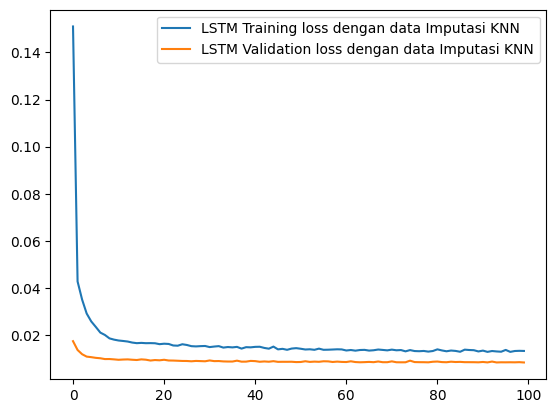

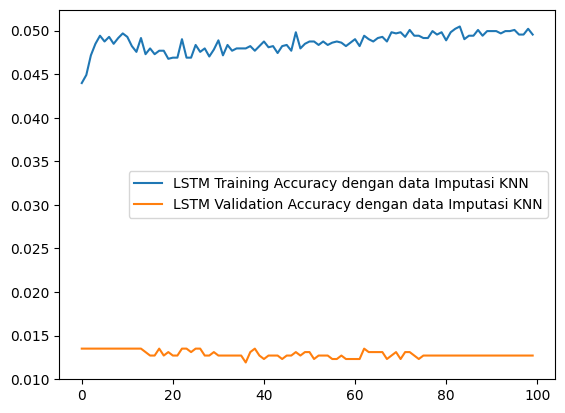

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics='accuracy')
history = model.fit(x_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(x_test_fold, y_test_fold))

plt.plot(history.history['loss'], label='LSTM Training loss dengan data Imputasi KNN')
plt.plot(history.history['val_loss'], label='LSTM Validation loss dengan data Imputasi KNN')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='LSTM Training Accuracy dengan data Imputasi KNN')
plt.plot(history.history['val_accuracy'], label='LSTM Validation Accuracy dengan data Imputasi KNN')
plt.legend()
plt.show()


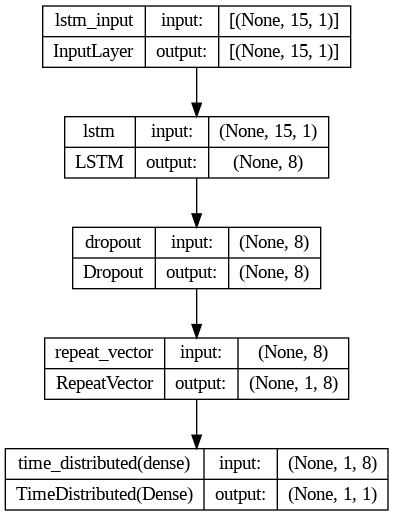

In [ ]:
from tensorflow.keras.utils import plot_model

# Memplot arsitektur model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# design network LSTM
model1 = Sequential()
model1.add(LSTM(8,activation='relu', input_shape=(n_steps_in, n_features), kernel_regularizer=l2(0.0001)))
model1.add(Dropout(0.1))
model1.add(RepeatVector(n_steps_out))
model1.add(TimeDistributed(Dense(n_features)))

NameError: ignored

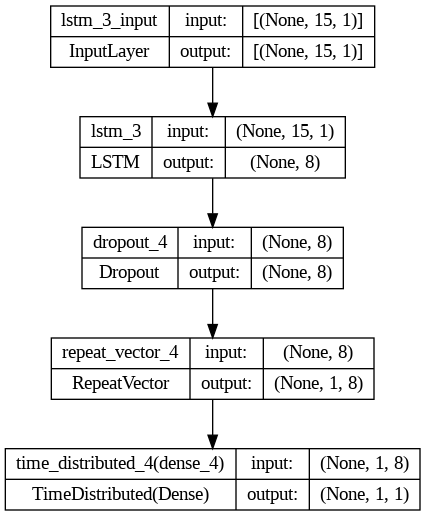

In [ ]:
plot_model(model1, to_file='model_pplot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# design network GRU
model_gru = Sequential()
model_gru.add(GRU(8,activation='relu', input_shape=(n_steps_in, n_features), kernel_regularizer=l2(0.01)))
model_gru.add(Dropout(0.3))
model_gru.add(RepeatVector(n_steps_out))
model_gru.add(TimeDistributed(Dense(n_features)))


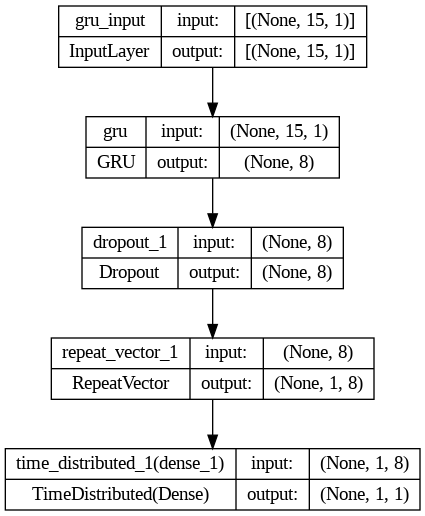

In [ ]:
plot_model(model_gru, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

# model_gru.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# history_gru = model_gru.fit(x_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(x_test_fold, y_test_fold))

# plt.plot(history_gru.history['loss'], label='GRU Training loss dengan data Imputasi KNN')
# plt.plot(history_gru.history['val_loss'], label='GRU Validation loss dengan data Imputasi KNN')
# plt.legend()
# plt.show()

# # Plot accuracy
# plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy dengan data Imputasi KNN')
# plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy dengan data Imputasi KNN')
# plt.legend()
# plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Skripsi/saved_models/model-lst-knn_withoutScall.hdf5')
# model_gru.save('/content/drive/MyDrive/Skripsi/saved_models/model-gru-withoutScall.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predictions = model.predict(x_test)
print('Prediction LSTM (1)')
print(predictions.shape)
print(y_test.shape)

print('\n')
print('Prediction LSTM (2)')
predictionskedua = model.predict(x_testkedua)
print(predictionskedua.shape)
print(y_testkedua.shape)

135/135 [==============================] - 0s 3ms/step
Prediction LSTM (1)
(4305, 1, 1)
(4305, 1)


Prediction LSTM (2)
90/90 [==============================] - 0s 4ms/step
(2865, 1, 1)
(2865, 1)


In [ ]:
# predictions_gru = model_gru.predict_generator(x_test)

# print('Prediction GRU (1)')
# print(predictions.shape)
# print(y_test.shape)

# print('\n')
# print('Prediction GRU (2)')
# predictionskedua_gru = model_gru.predict_generator(x_testkedua)
# print(predictionskedua.shape)
# print(y_testkedua.shape)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
#reshape (1)
predictions = np.reshape(predictions, (4305*1, 1))
real1 = np.reshape(y_test, (4305*1, 1))

#rescale
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real1 = pd.DataFrame(real1)
real1 = scaler.inverse_transform(real1)
real1 = pd.DataFrame(real1)

mse = mean_squared_error(real1, predictions)
# Menghitung RMSE, MSE, MAD
rmse = np.sqrt(mse)
mad = mean_absolute_error(real1, predictions)
# mae = np.mean(np.abs(predictions - real1))
r2 = r2_score(real1, predictions)

# Menampilkan hasil evaluasi
print(f'RMSE (Training)LSTM (1) 7:3: {rmse}')
print(f'MAD (Training) LSTM (1) 7:3: {mad}')
# print(f'MAE (Training) LSTM (1) 7:3: {mae}')
print(f'R^2 (Training) LSTM (1) 7:3: {r2}')


#reshape (2)
predictionskedua = np.reshape(predictionskedua, (2865*1, 1))
real2 = np.reshape(y_testkedua, (2865*1, 1))


#rescale
predictionskedua = pd.DataFrame(predictionskedua)
predictionskedua = scaler.inverse_transform(predictionskedua)
predictionskedua = pd.DataFrame(predictionskedua)

real2 = pd.DataFrame(real2)
real2 = scaler.inverse_transform(real2)
real2 = pd.DataFrame(real2)

# Menghitung RMSE,, MSE, MAD
mse = mean_squared_error(real2, predictionskedua)
rmse = np.sqrt(mse)
mad = mean_absolute_error(real2, predictionskedua)
mae = np.mean(np.abs(predictionskedua - real2))
r2 = r2_score(real2, predictionskedua)


# Menampilkan hasil evaluasi
print(f'\nRMSE (Training)LSTM (2) 8:2 {rmse}')
print(f'MAD (Training) LSTM (2) 8:2 {mad}')
print(f'R^2 (Training) LSTM (1) 8:2: {r2}')



RMSE (Training)LSTM (1) 7:3: 18.294478504037837
MAD (Training) LSTM (1) 7:3: 12.171351163571842
R^2 (Training) LSTM (1) 7:3: 0.46725887157351254

RMSE (Training)LSTM (2) 8:2 18.492773293362127
MAD (Training) LSTM (2) 8:2 11.203129900602116
R^2 (Training) LSTM (1) 8:2: 0.5142243459100331


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
#7:3
confusion_matrix = metrics.confusion_matrix(real1.idxmax(axis=1), predictions.idxmax(axis=1))
print(f'Confusion Matrix LSTM 7:3: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real1.idxmax(axis=1), predictions.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])

#8:2
confusion_matrix = metrics.confusion_matrix(real2.idxmax(axis=1), predictionskedua.idxmax(axis=1))
print(f'\nConfusion Matrix LSTM 8:2: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real2.idxmax(axis=1), predictionskedua.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])


Confusion Matrix LSTM 7:3: 
[[4305]]
              precision  recall  f1-score  total
0                   1.0     1.0       1.0    3.0
accuracy            1.0     1.0       1.0    3.0
macro avg           1.0     1.0       1.0    3.0
weighted avg        1.0     1.0       1.0    3.0

Confusion Matrix LSTM 8:2: 
[[2865]]
              precision  recall  f1-score  total
0                   1.0     1.0       1.0    3.0
accuracy            1.0     1.0       1.0    3.0
macro avg           1.0     1.0       1.0    3.0
weighted avg        1.0     1.0       1.0    3.0


In [ ]:
#reshape (1)
predictions_gru = np.reshape(predictions_gru, (4305*1, 1))
real1_gru = np.reshape(y_test, (4305*1, 1))


#rescale
predictions_gru = pd.DataFrame(predictions_gru)
predictions_gru = scaler.inverse_transform(predictions_gru)
predictions_gru = pd.DataFrame(predictions_gru)

real1_gru = pd.DataFrame(real1_gru)
real1_gru = scaler.inverse_transform(real1_gru)
real1_gru= pd.DataFrame(real1_gru)

# Menghitung RMSE, MSE, MAD
rmse = np.sqrt(mse)
mad = mean_absolute_error(real1_gru, predictions_gru)
r2 = r2_score(real1_gru, predictions_gru)

# Menampilkan hasil evaluasi
print(f'RMSE (Training) GRU (1) 7:3: {rmse}')
print(f'MAD (Training) GRU (1) 7:3: {mad}')
print(f'R^2 (Training) GRU (1) 7:3: {r2}')

#reshape (2)
predictionskedua_gru = np.reshape(predictionskedua_gru, (2865*1, 1))
real2_gru = np.reshape(y_testkedua, (2865*1, 1))

#rescale
predictionskedua_gru = pd.DataFrame(predictionskedua_gru)
predictionskedua_gru = scaler.inverse_transform(predictionskedua_gru)
predictionskedua_gru = pd.DataFrame(predictionskedua_gru)

real2_gru = pd.DataFrame(real2_gru)
real2_gru = scaler.inverse_transform(real2_gru)
real2_gru = pd.DataFrame(real2_gru)

# Menghitung RMSE, MSE, MAD
rmse = np.sqrt(mse)
mad = mean_absolute_error(real2_gru, predictionskedua_gru)
r2 = r2_score(real2_gru, predictionskedua_gru)

# Menampilkan hasil evaluasi
print(f'\nRMSE (Training) GRU (2) 8:2 {rmse}')
print(f'MAD (Training) GRU (2) 8:2 {mad}')
print(f'R^2 (Training) GRU (1) 8:2: {r2}')

In [ ]:
#7:3
confusion_matrix = metrics.confusion_matrix(real1_gru.idxmax(axis=1), predictions_gru.idxmax(axis=1))
print(f'Confusion Matrix GRU 7:3: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real1_gru.idxmax(axis=1), predictions_gru.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])

#8:2
confusion_matrix = metrics.confusion_matrix(real2_gru.idxmax(axis=1), predictionskedua_gru.idxmax(axis=1))
print(f'\nConfusion Matrix GRU 8:2: \n{confusion_matrix}')

# Menampilkan hasil evaluasi dalam bentuk tabel
report = metrics.classification_report(real2_gru.idxmax(axis=1), predictionskedua_gru.idxmax(axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop(columns=['support'])
df['total'] = df.sum(numeric_only=True, axis=1)
print(df[['precision', 'recall', 'f1-score', 'total']])


In [ ]:
df_final = pd.DataFrame()
df_finalkedua = pd.DataFrame()
df_final_gru = pd.DataFrame()
df_finalkedua_gru = pd.DataFrame()

In [ ]:
#LSTM


# (1)

df_final['PM2.5'] = real1.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_final['PM2.5_Pred'] = predictions.squeeze()

# (2)
df_finalkedua['PM2.5'] = real2.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finalkedua['PM2.5_Pred'] = predictionskedua.squeeze()



In [ ]:
#GRU
# (1)

df_final_gru['PM2.5'] = real1_gru.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_final_gru['PM2.5_Pred'] = predictions_gru.squeeze()

# (2)
df_finalkedua_gru['PM2.5'] = real2_gru.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finalkedua_gru['PM2.5_Pred'] = predictionskedua_gru.squeeze()


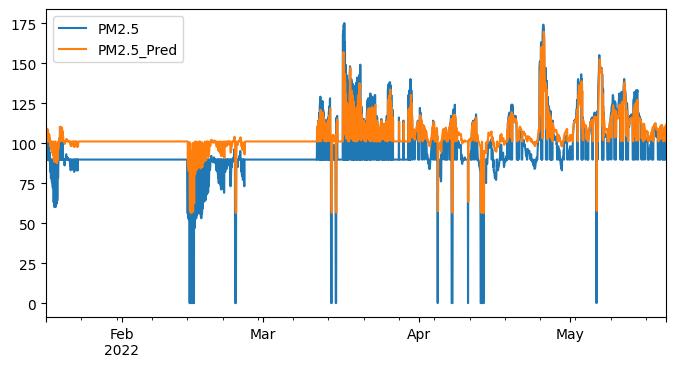

In [ ]:
#LSTM
#7:3
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_final.index = datelist_train[:len(df_final)]


  # Set batas waktu hingga Mei minggu ke dua
end_date = "2022-05-20"  # Ganti tanggal sesuai kebutuhan

# Filter DataFrame hingga batas waktu tertentu
df_plot = df_final.loc[df_final.index <= end_date]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_plot[[column, f'{column}_Pred']].plot()
    plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_final[['PM2.5']]
df_pred_gru = df_final[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MAE untuk setiap kolom
mae_scores_gru = mean_absolute_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAE: {mae_scores_gru[i]}, R2: {r2_scores_gru[i]}")

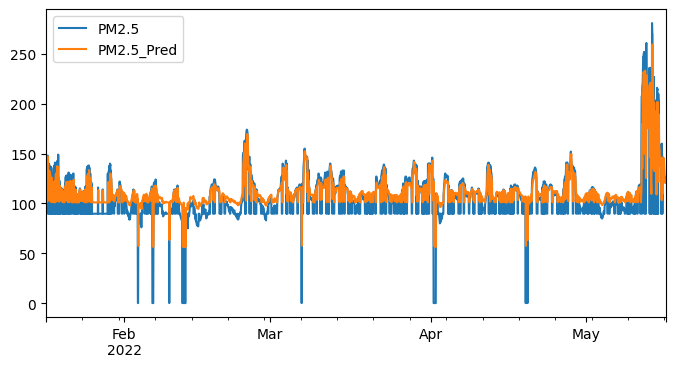

In [ ]:
  #8:2
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_finalkedua.index = datelist_train[:len(df_finalkedua)]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_finalkedua[[column, f'{column}_Pred']].plot()
    plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_finalkedua[['PM2.5']]
df_pred_gru = df_finalkedua[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MAE untuk setiap kolom
mae_scores_gru = mean_absolute_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAE: {mae_scores_gru[i]}, R2: {r2_scores_gru[i]}")

In [ ]:
#GRU
#7:3

mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_final_gru.index = datelist_train[:len(df_final_gru)]


  # Set batas waktu hingga Mei minggu ke dua
end_date = "2022-05-20"  # Ganti tanggal sesuai kebutuhan

# Filter DataFrame hingga batas waktu tertentu
df_plot = df_final_gru.loc[df_final_gru.index <= end_date]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_plot[[column, f'{column}_Pred']].plot()
    plt.show()

In [ ]:

#8:2
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False
df_finalkedua_gru.index = datelist_train[:len(df_finalkedua_gru)]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_finalkedua_gru[[column, f'{column}_Pred']].plot()
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import numpy as np

# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_finalkedua_gru[['PM2.5']]
df_pred_gru = df_finalkedua_gru[['PM2.5']]


# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')
mae_scores_gru = mean_absolute_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil termasuk RMSE, MSE, MAD, dan R²
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAE: {mae_scores_gru[i]}, R²: {r2_scores_gru[i]}")



###**Forecating 31 hari kedepan: 01-10-2023 sampai 31-10-2023**

In [ ]:
#buat variabel jalur/path filedataset agar membaca dataset dari googledrive
path = '/content/drive/MyDrive/Skripsi/data-testt (1).xlsx'

#Reading the dataset
data_test = pd.read_excel(path)

In [ ]:
data_test

,No,Tanggal,Jam,PM10,PM2.5,SO2,CO,O3,NO2,Suhu (°C),Titik Embun (°C),Relative Kelembaban (%),ISPU Status
0,NaN,2023-10-01,00:00:00,-,-,-,-,-,-,26,24,89,-
1,NaN,2023-10-01,01:00:00,-,-,-,-,-,-,27,24,84,-
2,NaN,2023-10-01,02:00:00,-,-,-,-,-,-,26,25,94,-
3,NaN,2023-10-01,03:00:00,85,131,29,22,30,23,26,25,94,Tidak Sehat
4,NaN,2023-10-01,04:00:00,88,163,29,22,30,23,25,24,94,Tidak Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,NaN,2023-10-31,19:00:00,81,107,29,22,29,19,30,24,70,Tidak Sehat
740,NaN,2023-10-31,20:00:00,81,107,29,22,29,19,29,25,79,Tidak Sehat
741,NaN,2023-10-31,21:00:00,80,106,29,22,29,19,29,24,74,Tidak Sehat
742,NaN,2023-10-31,22:00:00,80,105,29,22,29,19,29,24,74,Tidak Sehat


In [ ]:
data_test['Tanggal'] = pd.date_range('2023-10-01', periods=744, freq='H').date

# Buat kolom Waktu dengan interval 1 jam dari 00:00 sampai 23:00
data_test['Waktu'] = pd.date_range('2023-10-01', periods=744, freq='H').time

# Gabungkan kolom Tanggal dan Waktu menjadi satu kolom datetime
data_test['Datetime'] = pd.to_datetime(data_test['Tanggal'].astype(str) + ' ' + data_test['Waktu'].astype(str))

# Pindahkan kolom Datetime ke posisi pertama
datetime_col = data_test.pop('Datetime')
data_test.insert(0, 'Datetime', datetime_col)

# Hapus kolom Tanggal, Jam, dan Waktu
data_test = data_test.drop(['Tanggal', 'Jam', 'Waktu', 'No','Titik Embun (°C)', 'ISPU Status', 'Suhu (°C)', 'Relative Kelembaban (%)'], axis=1)
data_test

,Datetime,PM10,PM2.5,SO2,CO,O3,NO2
0,2023-10-01 00:00:00,-,-,-,-,-,-
1,2023-10-01 01:00:00,-,-,-,-,-,-
2,2023-10-01 02:00:00,-,-,-,-,-,-
3,2023-10-01 03:00:00,85,131,29,22,30,23
4,2023-10-01 04:00:00,88,163,29,22,30,23
...,...,...,...,...,...,...,...
739,2023-10-31 19:00:00,81,107,29,22,29,19
740,2023-10-31 20:00:00,81,107,29,22,29,19
741,2023-10-31 21:00:00,80,106,29,22,29,19
742,2023-10-31 22:00:00,80,105,29,22,29,19


In [ ]:
# Extract dates and times (will be used in visualization)
datelist_train2 = list(data_test['Datetime'])



In [ ]:
# datelist_train2
data_test.set_index("Datetime",inplace=True)
data_test

,PM10,PM2.5,SO2,CO,O3,NO2
Datetime,,,,,,
2023-10-01 00:00:00,-,-,-,-,-,-
2023-10-01 01:00:00,-,-,-,-,-,-
2023-10-01 02:00:00,-,-,-,-,-,-
2023-10-01 03:00:00,85,131,29,22,30,23
2023-10-01 04:00:00,88,163,29,22,30,23
...,...,...,...,...,...,...
2023-10-31 19:00:00,81,107,29,22,29,19
2023-10-31 20:00:00,81,107,29,22,29,19
2023-10-31 21:00:00,80,106,29,22,29,19


In [ ]:
#Mereplace - dengan Nan Pada keseluruhan dataset
col_new = ['PM2.5']
data_test = data_test[col_new].replace('-', np.nan)
data_test

,PM2.5
Datetime,
2023-10-01 00:00:00,NaN
2023-10-01 01:00:00,NaN
2023-10-01 02:00:00,NaN
2023-10-01 03:00:00,131.0
2023-10-01 04:00:00,163.0
...,...
2023-10-31 19:00:00,107.0
2023-10-31 20:00:00,107.0
2023-10-31 21:00:00,106.0


In [ ]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_test)
scaled_df = pd.DataFrame(scaled_data, columns=data_test.columns, index=data_test.index) ##

#Membuat  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

#Menggunakan KNNImputer untuk impute missing values
imputed_data = knn_imputer.fit_transform(scaled_df)
imputed_df = pd.DataFrame(imputed_data, columns=scaled_df.columns)
#Inverse transform dari scale ke original dataset
original_scale_data = scaler.inverse_transform(imputed_data)
data_test = pd.DataFrame(original_scale_data, columns=scaled_df.columns, index=data_test.index)
data_test

,PM2.5
Datetime,
2023-10-01 00:00:00,120.734622
2023-10-01 01:00:00,120.734622
2023-10-01 02:00:00,120.734622
2023-10-01 03:00:00,131.000000
2023-10-01 04:00:00,163.000000
...,...
2023-10-31 19:00:00,107.000000
2023-10-31 20:00:00,107.000000
2023-10-31 21:00:00,106.000000


In [ ]:
#split dataset train dan test (1)
total_dataset = len(df_input)
total_datatest = len(data_test)

#split dataset train dan test (2)
df_train2  = df_input[:int(total_dataset)]
df_test2  = df_input[:int(total_datatest)]



#scaled data
scaler = MinMaxScaler()
df_train_scaled2 = scaler.fit_transform(df_train2)
df_test_scaled2 = scaler.fit_transform(df_test2)



print('Data for Train:', df_train2.shape)
print('Total day  for Train:', df_train2.shape[0]/24)
print('\nData for test:', df_test2.shape)
print('Total day  for Test:', df_test2.shape[0]/24)


Data for Train: (14400, 1)
Total day  for Train: 600.0

Data for test: (744, 1)
Total day  for Test: 31.0


In [ ]:
n_steps_in, n_steps_out = 15, 1


#Convert into input/output
x_train2, y_train2 = split_sequences(df_train_scaled2, n_steps_in, n_steps_out)
x_test2, y_test2 = split_sequences(df_test_scaled2, n_steps_in, n_steps_out)

#The dataset knows the number of features
n_featuress = x_train.shape[2]

print('Data input structur for training:')
print(x_train[0])
print('\nData output structur for validation:')
print(y_train[0])

Data input structur for training:
[[0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.54358774]
 [0.55757576]
 [0.55757576]
 [0.56969697]
 [0.56363636]]

Data output structur for validation:
[0.56969697]


In [ ]:
print('Total features:', n_featuress)
print('Total  train data:', x_train2.shape)
print('Total validation train data:', y_train2.shape)
print('Total test data:', x_test2.shape)
print('Total validation test data:', y_test2.shape)


In [ ]:
# predictions = model_gru.predict(x_test2)
# print(predictions.shape)
# print(y_test2.shape)

predictions = model.predict(x_test2)
print(predictions.shape)
print(y_test2.shape)


23/23 [==============================] - 0s 3ms/step
(729, 1, 1)
(729, 1)


In [ ]:
predictions

array([[[0.6045072 ]],

       [[0.6054431 ]],

       [[0.6069503 ]],

       [[0.60748327]],

       [[0.5952344 ]],

       [[0.5830504 ]],

       [[0.5979067 ]],

       [[0.6194609 ]],

       [[0.6061442 ]],

       [[0.5857444 ]],

       [[0.5813301 ]],

       [[0.54246455]],

       [[0.55983067]],

       [[0.5821694 ]],

       [[0.51876783]],

       [[0.49570096]],

       [[0.551831  ]],

       [[0.5134871 ]],

       [[0.47741553]],

       [[0.54265857]],

       [[0.50422865]],

       [[0.537665  ]],

       [[0.5120381 ]],

       [[0.47461006]],

       [[0.53982836]],

       [[0.51469505]],

       [[0.48212138]],

       [[0.4869091 ]],

       [[0.47638148]],

       [[0.524831  ]],

       [[0.5030542 ]],

       [[0.46746665]],

       [[0.24761268]],

       [[0.44461074]],

       [[0.23461059]],

       [[0.43176946]],

       [[0.4192806 ]],

       [[0.3957543 ]],

       [[0.3902115 ]],

       [[0.38973436]],

       [[0.3894127 ]],

       [[0.38916

In [ ]:
#reshape
predictions = np.reshape(predictions, (729*1, 1))
real1 = np.reshape(y_test2, (729*1, 1))

#rescale
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real1 = pd.DataFrame(real1)
real1 = scaler.inverse_transform(real1)
real1 = pd.DataFrame(real1)


print(predictions.shape)
print(real1.shape)

(729, 1)
(729, 1)


In [ ]:
df_finall = pd.DataFrame()
df_finallkedua = pd.DataFrame()

In [ ]:
# (1)

df_finall['PM2.5'] = real1.squeeze()  # Use squeeze to convert (4305, 1) to (4305,)
df_finall['PM2.5_Pred'] = predictions.squeeze()

# (2)
df_finallkedua['PM2.5'] = real2.squeeze()  # Use squeeze to convert (2865, 1) to (2865,)
df_finallkedua['PM2.5_Pred'] = predictionskedua.squeeze()


In [ ]:
df_finall

,PM2.5,PM2.5_Pred
0,94.000000,90.071571
1,94.000000,90.211021
2,94.000000,90.435593
3,89.691978,90.515007
4,89.691978,88.689926
...,...,...
724,110.000000,102.032143
725,107.000000,102.706963
726,104.000000,102.215828
727,96.000000,99.676895


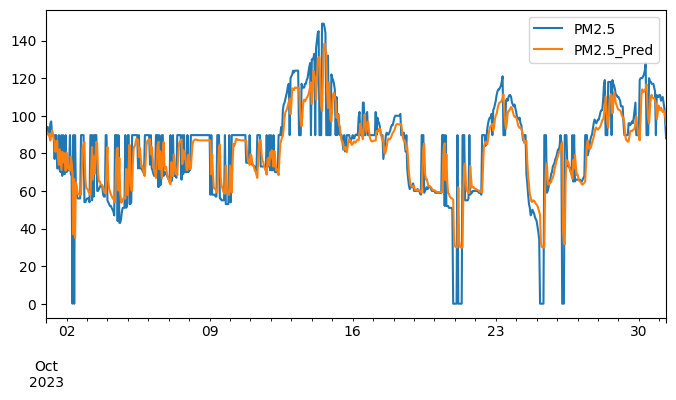

In [ ]:

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['axes.grid'] = False

# Pastikan panjang datelist_train2[:len(df_finall)] sesuai dengan panjang DataFrame
df_finall.index = datelist_train2[:len(df_finall)]

columns_to_plot = ['PM2.5']

for column in columns_to_plot:
    df_finall[[column, f'{column}_Pred']].plot()
    plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Misalkan df_real_gru adalah DataFrame dengan data real dan df_pred_gru adalah DataFrame dengan data prediksi dari model GRU
df_real_gru = df_finall[['PM2.5']]
df_pred_gru = df_finall[['PM2.5_Pred']]

# Menghitung RMSE untuk setiap kolom
rmse_scores_gru = np.sqrt(mean_squared_error(df_real_gru, df_pred_gru, multioutput='raw_values'))

# Menghitung MAE untuk setiap kolom
mae_scores_gru = mean_absolute_error(df_real_gru, df_pred_gru, multioutput='raw_values')

# Menghitung R2 untuk setiap kolom
r2_scores_gru = r2_score(df_real_gru, df_pred_gru, multioutput='raw_values')

# Output hasil
for i, col in enumerate(df_real_gru.columns):
    print(f"{col} - RMSE: {rmse_scores_gru[i]}, MAE: {mae_scores_gru[i]}, R2: {r2_scores_gru[i]}")


PM2.5 - RMSE: 14.740370508791937, MAE: 9.906679394996948, R2: 0.6509049393768488
